# Datascience Project: Heartbeat Notebook 1: Data Viz

## 1) Data analysis:

#

In [2]:
import pandas as pd
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from scipy.stats import pearsonr, spearmanr, kruskal
import plotly.graph_objs as go
from scipy.stats import shapiro
import scipy.stats as stats
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

### 2.1) Downloading the data

The data can be found in Kaggle. The directory paths need to be adjusted accordingly

In [4]:


mitbih_test = pd.read_csv("C:/users/dgnhk/dst_project/heartbeat_data/mitbih_test.csv",header=None)
mitbih_train = pd.read_csv("C:/users/dgnhk/dst_project/heartbeat_data/mitbih_train.csv",header=None)
ptbdb_abnormal = pd.read_csv("C:/users/dgnhk/dst_project/heartbeat_data/ptbdb_abnormal.csv",header=None)
ptbdb_normal = pd.read_csv("C:/users/dgnhk/dst_project/heartbeat_data/ptbdb_normal.csv",header=None)



### 2.1.1) Describing and characterizing the data

#### 2.1.1.1) Check Columns

In [7]:
#Check the Dataframes for similiarities in the columns
def check_dataframes(*dataframes, tolerance=0.1):
    """
    Check if the provided DataFrames have the same number of columns,
    same column names in the same order, and similar values in the columns.
    
    Parameters:
        dataframes: Variable number of pandas DataFrames to be checked.
        tolerance (float): Tolerance level for checking similarity of values.
                           Default is 0.1 (10% tolerance).
    
    Returns:
        bool: True if all checks pass, False otherwise.
    """
      
    checker = True
    # Check if the number of columns is the same for all DataFrames
    num_columns = len(dataframes[0].columns)
    if not all(len(df.columns) == num_columns for df in dataframes):
        print("Number of columns is not the same for all DataFrames.")
        checker = False
    else:
        print("Number of columns is the same for all DataFrames")
        checker = True
    
    # Check if column names are the same in the same order
    reference_columns = dataframes[0].columns.tolist()
    if not all(df.columns.tolist() == reference_columns for df in dataframes):
        print("Column names are not the same for all DataFrames or not in the same order.")
        checker = False
    
    """# Check if values in columns have similar statistics (mean and std)
    reference_stats = dataframes[0].describe()
    for df in dataframes[1:]:
        stats_diff = (df.describe() - reference_stats) / reference_stats
        print(stats_diff)
        print("-----")
        for stat_name in stats_diff.columns:
            if not np.all(np.abs(stats_diff[stat_name]) <= tolerance):
                print(f"{stat_name}: Fail")
                checker = False
            else:
                print(f"{stat_name}: Pass")"""
    
    #All checks passed
    print(f"All checks passed: {checker}")
    return checker

print("Check for mitbih dataframes (tolerance 25%)")
check_dataframes(mitbih_test, mitbih_train, tolerance=0.25)
print("------------------------------------------------------")

print("Check for ptbd dataframes (tolerance 25%)")
check_dataframes(ptbdb_abnormal, ptbdb_normal, tolerance=0.25)
print("------------------------------------------------------")

print("Check for all four dataframes (tolerance 25%)")
check_dataframes(mitbih_test, mitbih_train, ptbdb_abnormal, ptbdb_normal, tolerance=0.25)
print("------------------------------------------------------")


Check for mitbih dataframes (tolerance 25%)
Number of columns is the same for all DataFrames
All checks passed: True
------------------------------------------------------
Check for ptbd dataframes (tolerance 25%)
Number of columns is the same for all DataFrames
All checks passed: True
------------------------------------------------------
Check for all four dataframes (tolerance 25%)
Number of columns is the same for all DataFrames
All checks passed: True
------------------------------------------------------


#### 2.1.1.2) Info, heads and missing values for each df

In [8]:
#Display Info, heads and null / NaN-values for each df, also sum of dtypes
print("Evaluation of mitbhih_test")
display(mitbih_test.info())
display(mitbih_test.head())
print("Number of 0-values in mitbih_test: ", (mitbih_test.isnull().sum().sum()))
print("Number of NaN-values in mitbih_test: ", (mitbih_test.isna().sum().sum()))
dtypes=[]
for col in mitbih_test.columns:
    dtype = mitbih_test[col].dtype
    dtypes.append(dtype)
print("unique values of dtypes:")
display(pd.crosstab(dtypes, "counts", rownames=["Data type"], colnames=["Amount in columns"]))

print("---------------------------------------------------------------------------------------------------------------------------------")
print("Evaluation of mitbhih_train")
display(mitbih_train.info())
display(mitbih_train.head())
print("Number of 0-values in mitbih_train: ", (mitbih_train.isnull().sum().sum()))
print("Number of NaN-values in mitbih_train: ", (mitbih_train.isna().sum().sum()))
dtypes=[]
for col in mitbih_train.columns:
    dtype = mitbih_train[col].dtype
    dtypes.append(dtype)
print("unique values of dtypes:")
display(pd.crosstab(dtypes, "counts", rownames=["Data type"], colnames=["Amount in columns"]))


print("---------------------------------------------------------------------------------------------------------------------------------")
print("Evaluation of ptbd_abnormal")
display(ptbdb_abnormal.info())
display(ptbdb_abnormal.head())
print("Number of 0-values in ptbdb_abnormal: ", (ptbdb_abnormal.isnull().sum().sum()))
print("Number of NaN-values in ptbdb_abnormal: ", (ptbdb_abnormal.isna().sum().sum()))
dtypes=[]
for col in ptbdb_abnormal.columns:
    dtype = ptbdb_abnormal[col].dtype
    dtypes.append(dtype)
print("unique values of dtypes:")
display(pd.crosstab(dtypes, "counts", rownames=["Data type"], colnames=["Amount in columns"]))

print("---------------------------------------------------------------------------------------------------------------------------------")
print("Evaluation of ptbd_normal")
display(ptbdb_normal.info())
display(ptbdb_normal.head())
print("Number of 0-values in ptbdb_normal: ", (ptbdb_normal.isnull().sum().sum()))
print("Number of NaN-values in ptbdb_normal: ", (ptbdb_normal.isna().sum().sum()))
dtypes=[]
for col in ptbdb_normal.columns:
    dtype = ptbdb_normal[col].dtype
    dtypes.append(dtype)
print("unique values of dtypes:")
display(pd.crosstab(dtypes, "counts", rownames=["Data type"], colnames=["Amount in columns"]))

Evaluation of mitbhih_test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB


None

0         1         2         3         4         5         6    \
0  1.000000  0.758264  0.111570  0.000000  0.080579  0.078512  0.066116   
1  0.908425  0.783883  0.531136  0.362637  0.366300  0.344322  0.333333   
2  0.730088  0.212389  0.000000  0.119469  0.101770  0.101770  0.110619   
3  1.000000  0.910417  0.681250  0.472917  0.229167  0.068750  0.000000   
4  0.570470  0.399329  0.238255  0.147651  0.000000  0.003356  0.040268   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.049587  0.047521  0.035124  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.307692  0.296703  0.300366  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.123894  0.115044  0.132743  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.004167  0.014583  0.054167  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.080537  0.070470  0.090604  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 188 columns]

Number of 0-values in mitbih_test:  0
Number of NaN-values in mitbih_test:  0
unique values of dtypes:


Amount in columns  counts
Data type                
float64               188

---------------------------------------------------------------------------------------------------------------------------------
Evaluation of mitbhih_train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


None

0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 188 columns]

Number of 0-values in mitbih_train:  0
Number of NaN-values in mitbih_train:  0
unique values of dtypes:


Amount in columns  counts
Data type                
float64               188

---------------------------------------------------------------------------------------------------------------------------------
Evaluation of ptbd_abnormal
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 15.1 MB


None

0         1         2         3         4         5         6    \
0  0.932233  0.869679  0.886186  0.929626  0.908775  0.933970  0.801043   
1  1.000000  0.606941  0.384181  0.254237  0.223567  0.276836  0.253430   
2  1.000000  0.951613  0.923963  0.853303  0.791859  0.734255  0.672043   
3  0.977819  0.899261  0.230129  0.032348  0.142329  0.223660  0.328096   
4  0.935618  0.801661  0.805815  1.000000  0.722741  0.480789  0.454829   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.749783  0.687229  0.635100  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.184826  0.153349  0.121872  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.685100  0.670507  0.667435  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.367837  0.381701  0.389094  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.319834  0.266874  0.308411  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  1.0  
1  0.0  1.0  
2  0.0  1.0  
3  0.0  1.0  
4  0.0  1.0  

[5 rows x 188 columns]

Number of 0-values in ptbdb_abnormal:  0
Number of NaN-values in ptbdb_abnormal:  0
unique values of dtypes:


Amount in columns  counts
Data type                
float64               188

---------------------------------------------------------------------------------------------------------------------------------
Evaluation of ptbd_normal
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4046 entries, 0 to 4045
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 5.8 MB


None

0         1         2         3         4         5         6    \
0  1.000000  0.900324  0.358590  0.051459  0.046596  0.126823  0.133306   
1  1.000000  0.794681  0.375387  0.116883  0.000000  0.171923  0.283859   
2  0.909029  0.791482  0.423169  0.186712  0.000000  0.007836  0.063032   
3  1.000000  0.478893  0.056760  0.064176  0.081289  0.072732  0.055619   
4  1.000000  0.867238  0.201360  0.099349  0.141336  0.120934  0.108516   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.119125  0.110616  0.113047  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.293754  0.325912  0.345083  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.077002  0.074957  0.077342  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.048774  0.054478  0.041643  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.096393  0.093436  0.100828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 188 columns]

Number of 0-values in ptbdb_normal:  0
Number of NaN-values in ptbdb_normal:  0
unique values of dtypes:


Amount in columns  counts
Data type                
float64               188

In [7]:
# Create a dictionary to store the evaluation metrics
evaluation_results = {
    "Dataset": ["mitbih_test", "mitbih_train", "ptbdb_abnormal", "ptbdb_normal"],
    "RangeIndex": [21891, 87553, 10505, 4045],
    "Memory Usage (MB)": [31.4, 125.6, 15.1, 5.8],
    "Number of 0-values": [0, 0, 0, 0],
    "Number of NaN-values": [0, 0, 0, 0],
    "Data Types": ["float64 (188)", "float64 (188)", "float64 (188)", "float64 (188)"]
}

# Create a DataFrame from the dictionary
evaluation_df = pd.DataFrame(evaluation_results)

# Display the DataFrame
display(evaluation_df)

Dataset  RangeIndex  Memory Usage (MB)  Number of 0-values  \
0     mitbih_test       21891               31.4                   0   
1    mitbih_train       87553              125.6                   0   
2  ptbdb_abnormal       10505               15.1                   0   
3    ptbdb_normal        4045                5.8                   0   

   Number of NaN-values     Data Types  
0                     0  float64 (188)  
1                     0  float64 (188)  
2                     0  float64 (188)  
3                     0  float64 (188)

#### Conclusion from 2.1.1.2) 

We have no missing values, no NaN-values and no zero values.
The data seems to be already preprocessed, so that we can start with the examination.
maybe further preprocessing is necessary, for example to cluster different time slots for evaluation.
All Values are also in the correct format of float64 --> We will later visualize the target values.

#### 2.1.1.3) Describing the target variable(s)
Goal: How many target variables are there, how are they distributed and what can we conclude from it?
differentiated by Dataframe and overall Dataset

Examination of target variable in mitbih_train
0.000000000000000000e+00.88
0.0    72470
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64

Examination of target variable in mitbih_test
0.000000000000000000e+00.65
0.0    18117
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: count, dtype: int64


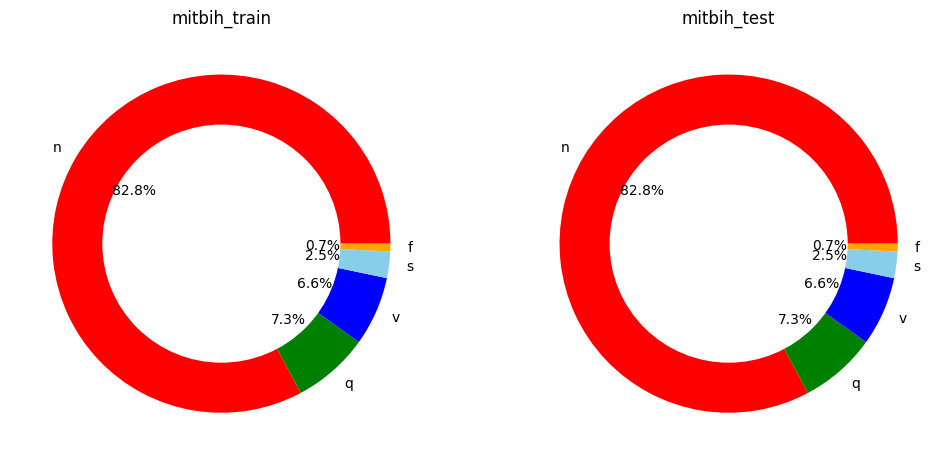

-------------------------------------------------------
Examination of target variable in ptbdb_abnormal
1.000000000000000000e+00.1
1.0    10505
Name: count, dtype: int64

Examination of target variable in ptbdb_normal
0.000000000000000000e+00.65
0.0    4045
Name: count, dtype: int64


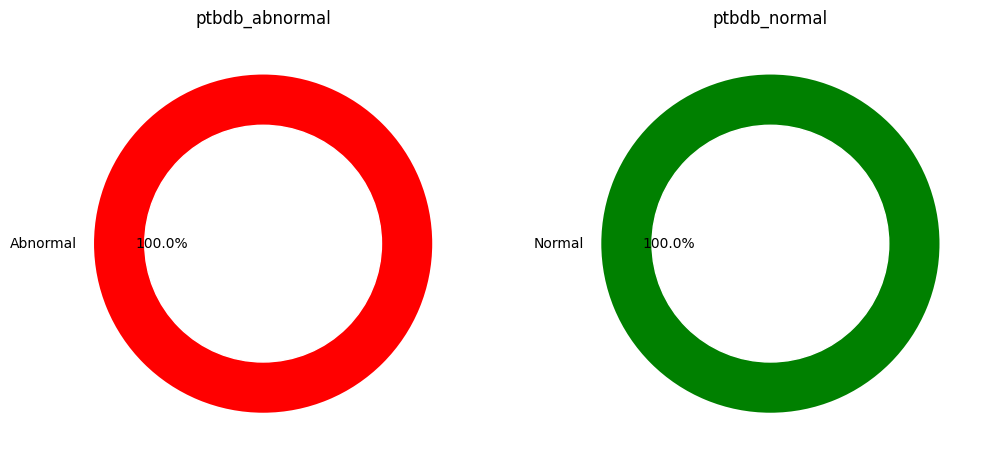

In [8]:
# Examination of target variable in mitbih_train
equilibre_train = mitbih_train.iloc[:, -1].value_counts()
print("Examination of target variable in mitbih_train")
print(equilibre_train)

# Examination of target variable in mitbih_test
equilibre_test = mitbih_test.iloc[:, -1].value_counts()
print("\nExamination of target variable in mitbih_test")
print(equilibre_test)

plt.figure(figsize=(12, 6))  # Erstellen einer gemeinsamen Figure

# Plot für mitbih_train
plt.subplot(1, 2, 1)  # Erstellen von Subplots: 1 Reihe, 2 Spalten, erster Plot
plt.title("mitbih_train")
my_circle_train = plt.Circle((0, 0), 0.7, color='white')
plt.pie(equilibre_train, labels=['n', 'q', 'v', 's', 'f'], colors=['red', 'green', 'blue', 'skyblue', 'orange'], autopct='%1.1f%%')
plt.gca().add_artist(my_circle_train)

# Plot für mitbih_test
plt.subplot(1, 2, 2)  # zweiter Plot in der gleichen Reihe
plt.title("mitbih_test")
my_circle_test = plt.Circle((0, 0), 0.7, color='white')
plt.pie(equilibre_test, labels=['n', 'q', 'v', 's', 'f'], colors=['red', 'green', 'blue', 'skyblue', 'orange'], autopct='%1.1f%%')
plt.gca().add_artist(my_circle_test)

plt.show()
print("-------------------------------------------------------")

# Examination of target variable in ptbdb_abnormal
equilibre_abnormal = ptbdb_abnormal.iloc[:, -1].value_counts()
print("Examination of target variable in ptbdb_abnormal")
print(equilibre_abnormal)

# Examination of target variable in ptbdb_normal
equilibre_normal = ptbdb_normal.iloc[:, -1].value_counts()
print("\nExamination of target variable in ptbdb_normal")
print(equilibre_normal)

plt.figure(figsize=(12, 6))  # Erstellen einer gemeinsamen Figure

# Plot für ptbdb_abnormal
plt.subplot(1, 2, 1)  # Erstellen von Subplots: 1 Reihe, 2 Spalten, erster Plot
plt.title("ptbdb_abnormal")
my_circle_abnormal = plt.Circle((0, 0), 0.7, color='white')
plt.pie(equilibre_abnormal, labels=['Abnormal'], colors=['red'], autopct='%1.1f%%')
plt.gca().add_artist(my_circle_abnormal)

# Plot für ptbdb_normal
plt.subplot(1, 2, 2)  # zweiter Plot in der gleichen Reihe
plt.title("ptbdb_normal")
my_circle_normal = plt.Circle((0, 0), 0.7, color='white')
plt.pie(equilibre_normal, labels=['Normal'], colors=['green'], autopct='%1.1f%%')
plt.gca().add_artist(my_circle_normal)

plt.show()

### 2.3 General statistical tests
In order to interpret the p-values of later tests correctly, we have to tests for the assumptions that the p-value tests require:
Statistical assumptions
Statistical tests make some common assumptions about the data they are testing:

Independence of observations, 
Homogeneity of variance,  
Normality of data 

## 3.1) General Visualization

### 3.1.1) Test for normal Distribution
Below is a function to plot the shapiro wilk p-value result for all columns except the target column.
the target column is displayed as qq plot and the p-value of a shapiro wilk test is given too.

c:\Users\Test\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


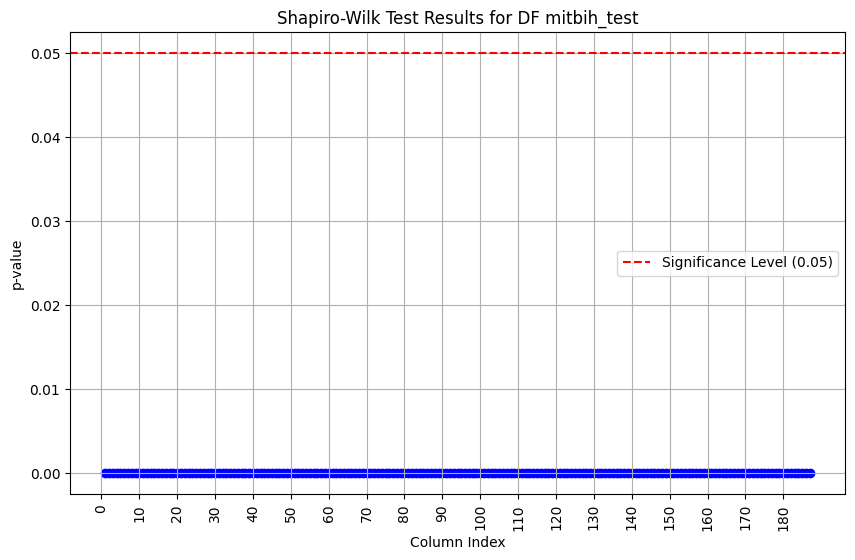

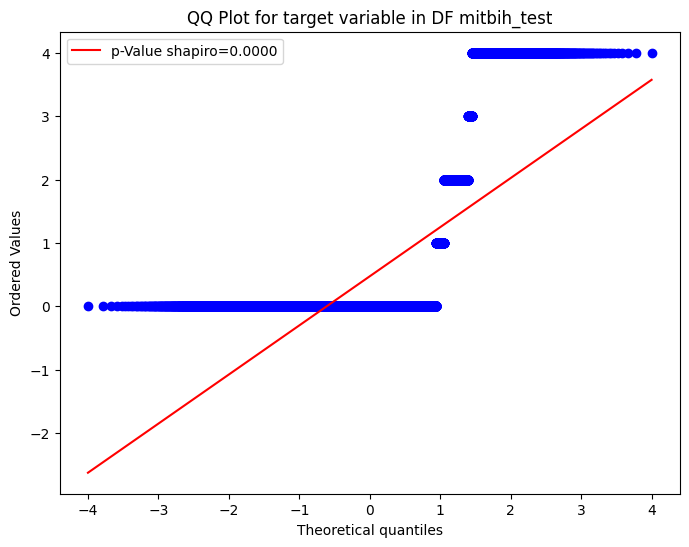

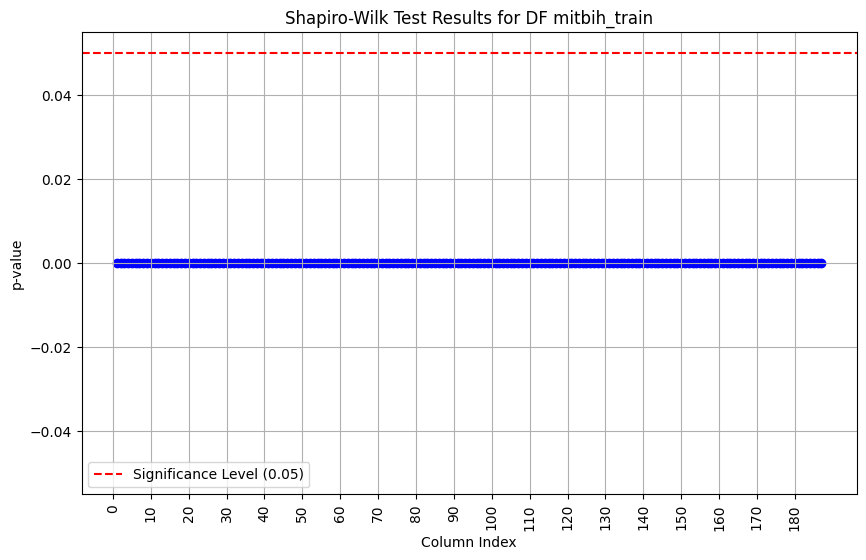

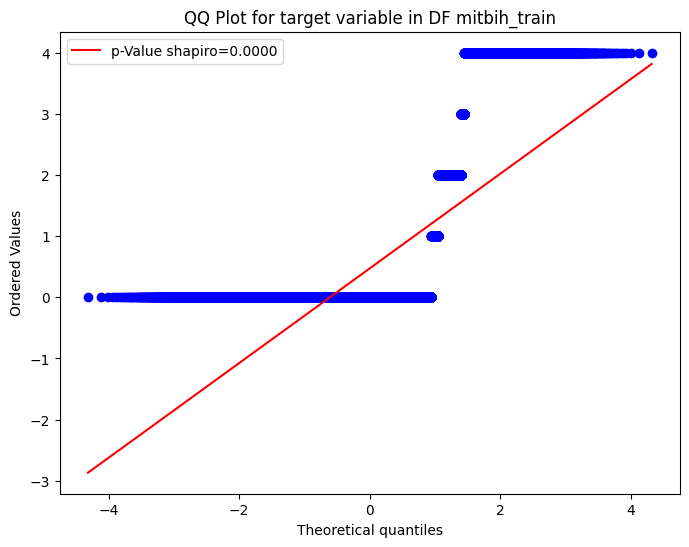

c:\Users\Test\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


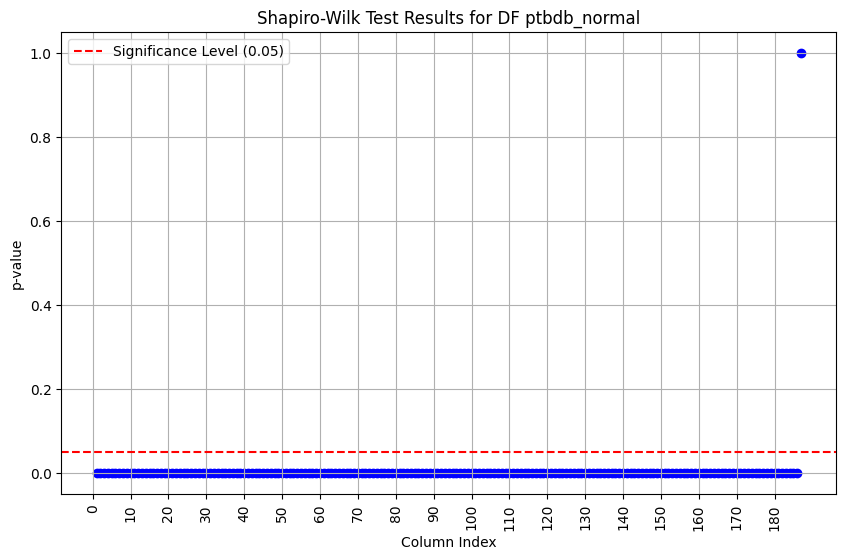

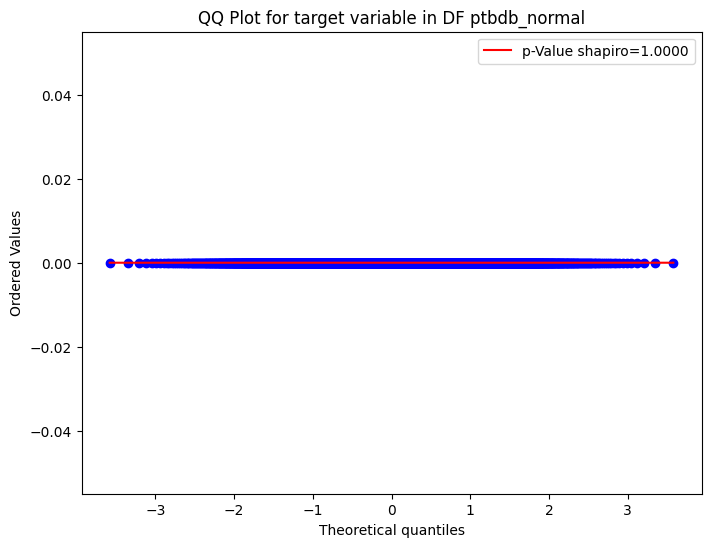

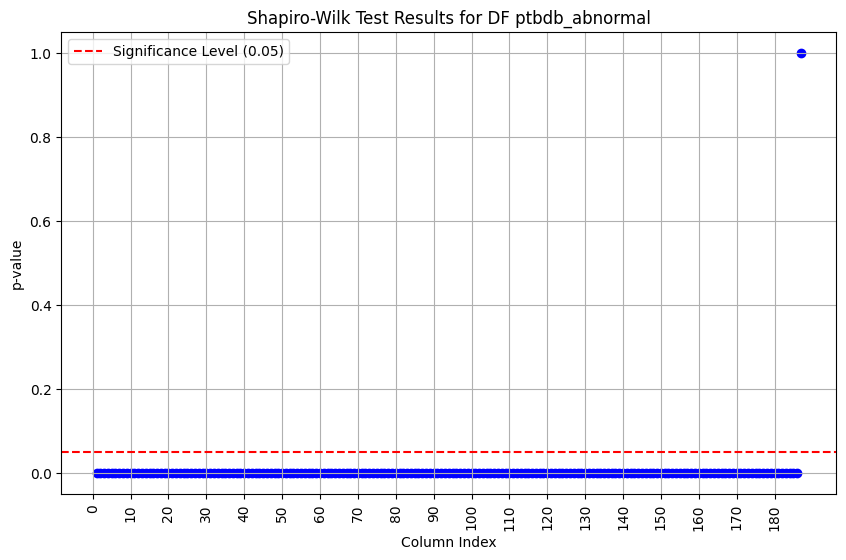

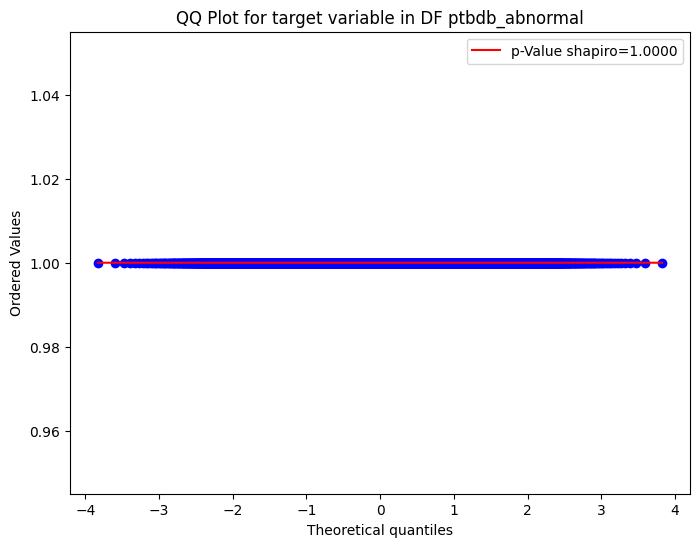

In [9]:
def shapiro_wilk_test_and_qq_plot(df):
    """
    Perform Shapiro-Wilk test for all columns of the DataFrame
    and create QQ-plot for the last column.

    Parameters:
        df (DataFrame): DataFrame containing the data for the tests.

    Returns:
        p_values (dict): Dictionary containing p-values for Shapiro-Wilk test for each column.
    """
    df_name = df.name if hasattr(df, 'name') and df.name is not None else str([name for name, obj in globals().items() if obj is df][0]);
    p_values = {}

    # Perform Shapiro-Wilk test for each column
    fig, ax = plt.subplots(figsize=(10, 6))
    for i, col in enumerate(df.columns[:-1], 1):
        stat, p_value = stats.shapiro(df[col])
        p_values[col] = p_value
        #print(f'Shapiro-Wilk Test for {col}: Statistics={stat}, p-value={p_value}')

        # Plot the p-values
        ax.scatter(i, p_value, color='blue') #label=f'{col}'

    ax.axhline(0.05, color='red', linestyle='--', label='Significance Level (0.05)')
    ax.set_title(f'Shapiro-Wilk Test Results for DF {df_name}')
    ax.set_xlabel('Column Index')
    ax.set_ylabel('p-value')
    ax.legend()
    xticks_positions = list(range(0, len(df.iloc[0, :-1]), 10))
    xticks_labels = [str(x) for x in xticks_positions]
    plt.xticks(xticks_positions, xticks_labels, rotation=90)
    #plt.xticks(range(1, len(df.columns[:-1]) + 1), df.columns[:-1], rotation=45) #old code
    plt.grid(True)
    plt.show()

    # Create QQ-Plot for the last column
    last_col = df.columns[-1]
    stat, p_value = stats.shapiro(df[last_col])
    fig, ax = plt.subplots(figsize=(8, 6))
    stats.probplot(df[last_col], dist="norm", plot=ax)
    ax.get_lines()[1].set_linestyle('-')
    ax.get_lines()[1].set_color('red')
    ax.get_lines()[1].set_label('Ideal Normal Distribution')
    ax.get_lines()[1].set_label(f'p-Value shapiro={p_value:.4f}')
    ax.legend()
    ax.set_title(f'QQ Plot for target variable in DF {df_name}')
    plt.show()

    #return p_values

shapiro_wilk_test_and_qq_plot(mitbih_test)
shapiro_wilk_test_and_qq_plot(mitbih_train)

shapiro_wilk_test_and_qq_plot(ptbdb_normal)
shapiro_wilk_test_and_qq_plot(ptbdb_abnormal)

#### Evaluation for 3.1.1)
we see, that the data is completely NOT normal distributed in all datasets.
Furthermore, the target variable in ptdbd dataset is normal distributed, but only because there is only one class in each dataset.
--> We need to shuffle the data and resample it for normal distribution or work with a modle, that can use such skewed distributions.

### 3.1.2) Plot any random signal
Below is a function to plot any signal, which is further specified for our usecase (different datasets with classes)

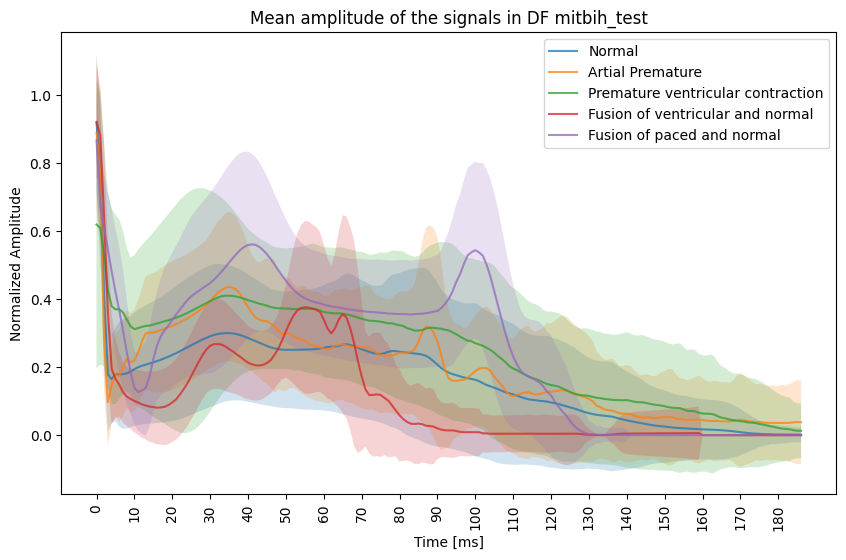

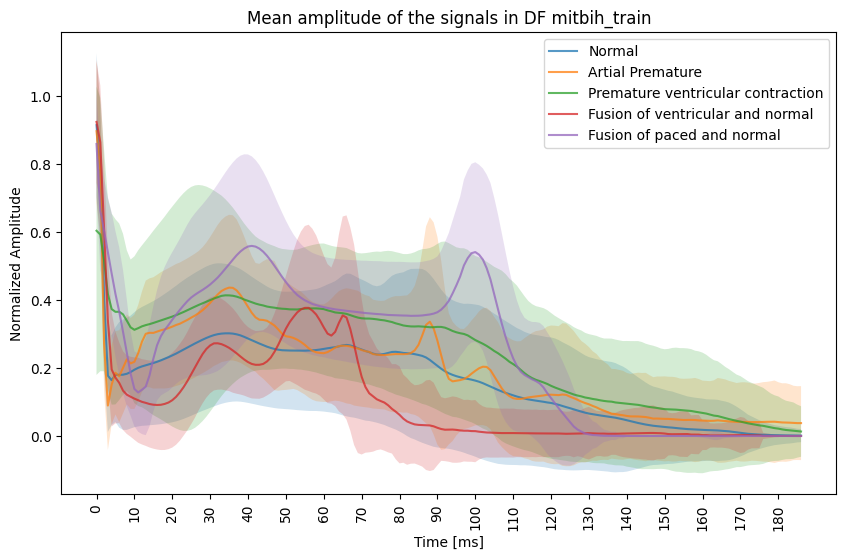

In [12]:
# plot any random signal
def plot_all_datapoints(train, ind, statistics=False):
    """
    Plot all datapoints (alpha=0.2) and mean and std for each class.

    Parameters:
        train (DataFrame): DataFrame containing the data.
        ind (int): Index of the row to plot.

    Returns:
        None
    """
    id_to_label = {
        0: "Normal",
        1: "Artial Premature",
        2: "Premature ventricular contraction",
        3: "Fusion of ventricular and normal",
        4: "Fusion of paced and normal"
    }

    # Extract label for the given index
    label1 = train.iloc[ind, 187]
    
    # Plot all datapoints with alpha=0.2
    #plt.plot(train.iloc[ind, :-1], alpha=1, label=f"Data for row {ind} \n (Class {id_to_label[label1]})")

    fig = plt.figure(figsize=(10,6))

    # Plot mean and std for each class with alpha=1
    if statistics==True:
        for i in range(5):
            class_data = train[train.iloc[:, 187] == i].iloc[:, :-1]
            mean_value = class_data.mean()
            std_value = class_data.std()
            plt.plot(mean_value, label=f"{id_to_label[i]}", alpha=0.75)
            plt.fill_between(range(len(mean_value)), mean_value - std_value, mean_value + std_value, alpha=0.2)
    
    # Add legend and show plot
    xticks_positions = list(range(0, len(train.iloc[ind, :-1]), 10))
    xticks_labels = [str(x) for x in xticks_positions]
    plt.xticks(xticks_positions, xticks_labels, rotation=90)
    plt.ylabel("Normalized Amplitude")
    plt.title(f"Mean amplitude of the signals in DF {[x for x in globals() if globals()[x] is train][0]}")
    plt.xlabel("Time [ms]")
    plt.legend()
    plt.show()


#plot_all_datapoints(mitbih_test, ind=1, statistics =True)
plot_all_datapoints(mitbih_test, 500, statistics=True)

#plot_all_datapoints(mitbih_train, ind=1, statistics =True)
plot_all_datapoints(mitbih_train, 500, statistics=True)



In [2]:
def plot_all_datapoints_2(train, ind, statistics=False):
    """
    Plot all datapoints (alpha=0.2) and mean and std for each class.

    Parameters:
        train (DataFrame): DataFrame containing the data.
        ind (int): Index of the row to plot.

    Returns:
        None
    """
    id_to_label = {
        0: "Normal",
        1: "Abnormal"#,
        #2: "Premature ventricular contraction",
        #3: "Fusion of ventricular and normal",
        #4: "Fusion of paced and normal"
    }

    # Extract label for the given index
    label1 = train.iloc[ind, 187]
    
    # Plot all datapoints with alpha=0.2
    plt.plot(train.iloc[ind, :-1], alpha=1, label=f"Data for row {ind} \n (Class {id_to_label[label1]})")

    # Plot mean and std for each class with alpha=1
    if statistics==True:
        for i in range(2):
            class_data = train[train.iloc[:, 187] == i].iloc[:, :-1]
            mean_value = class_data.mean()
            std_value = class_data.std()
            plt.plot(mean_value, label=f"Mean - {id_to_label[i]}", alpha=0.75)
            plt.fill_between(range(len(mean_value)), mean_value - std_value, mean_value + std_value, alpha=0.2)
    
    # Add legend and show plot
    xticks_positions = list(range(0, len(train.iloc[ind, :-1]), 10))
    xticks_labels = [str(x) for x in xticks_positions]
    plt.xticks(xticks_positions, xticks_labels, rotation=90)
    plt.ylabel("Normalized Amplitude")
    plt.title(f"Plot of Data for row {ind} in DF {[x for x in globals() if globals()[x] is train][0]}")
    plt.xlabel("Time [ms]")
    plt.legend()
    plt.show()

plot_all_datapoints_2(ptbdb_normal, ind=1, statistics =True)
plot_all_datapoints_2(ptbdb_normal, 500, statistics=True)

plot_all_datapoints_2(ptbdb_abnormal, ind=1, statistics =True)
plot_all_datapoints_2(ptbdb_abnormal, 500, statistics=True)

NameError: name 'ptbdb_normal' is not defined

### 3.2) correlation matrix and correlation plots

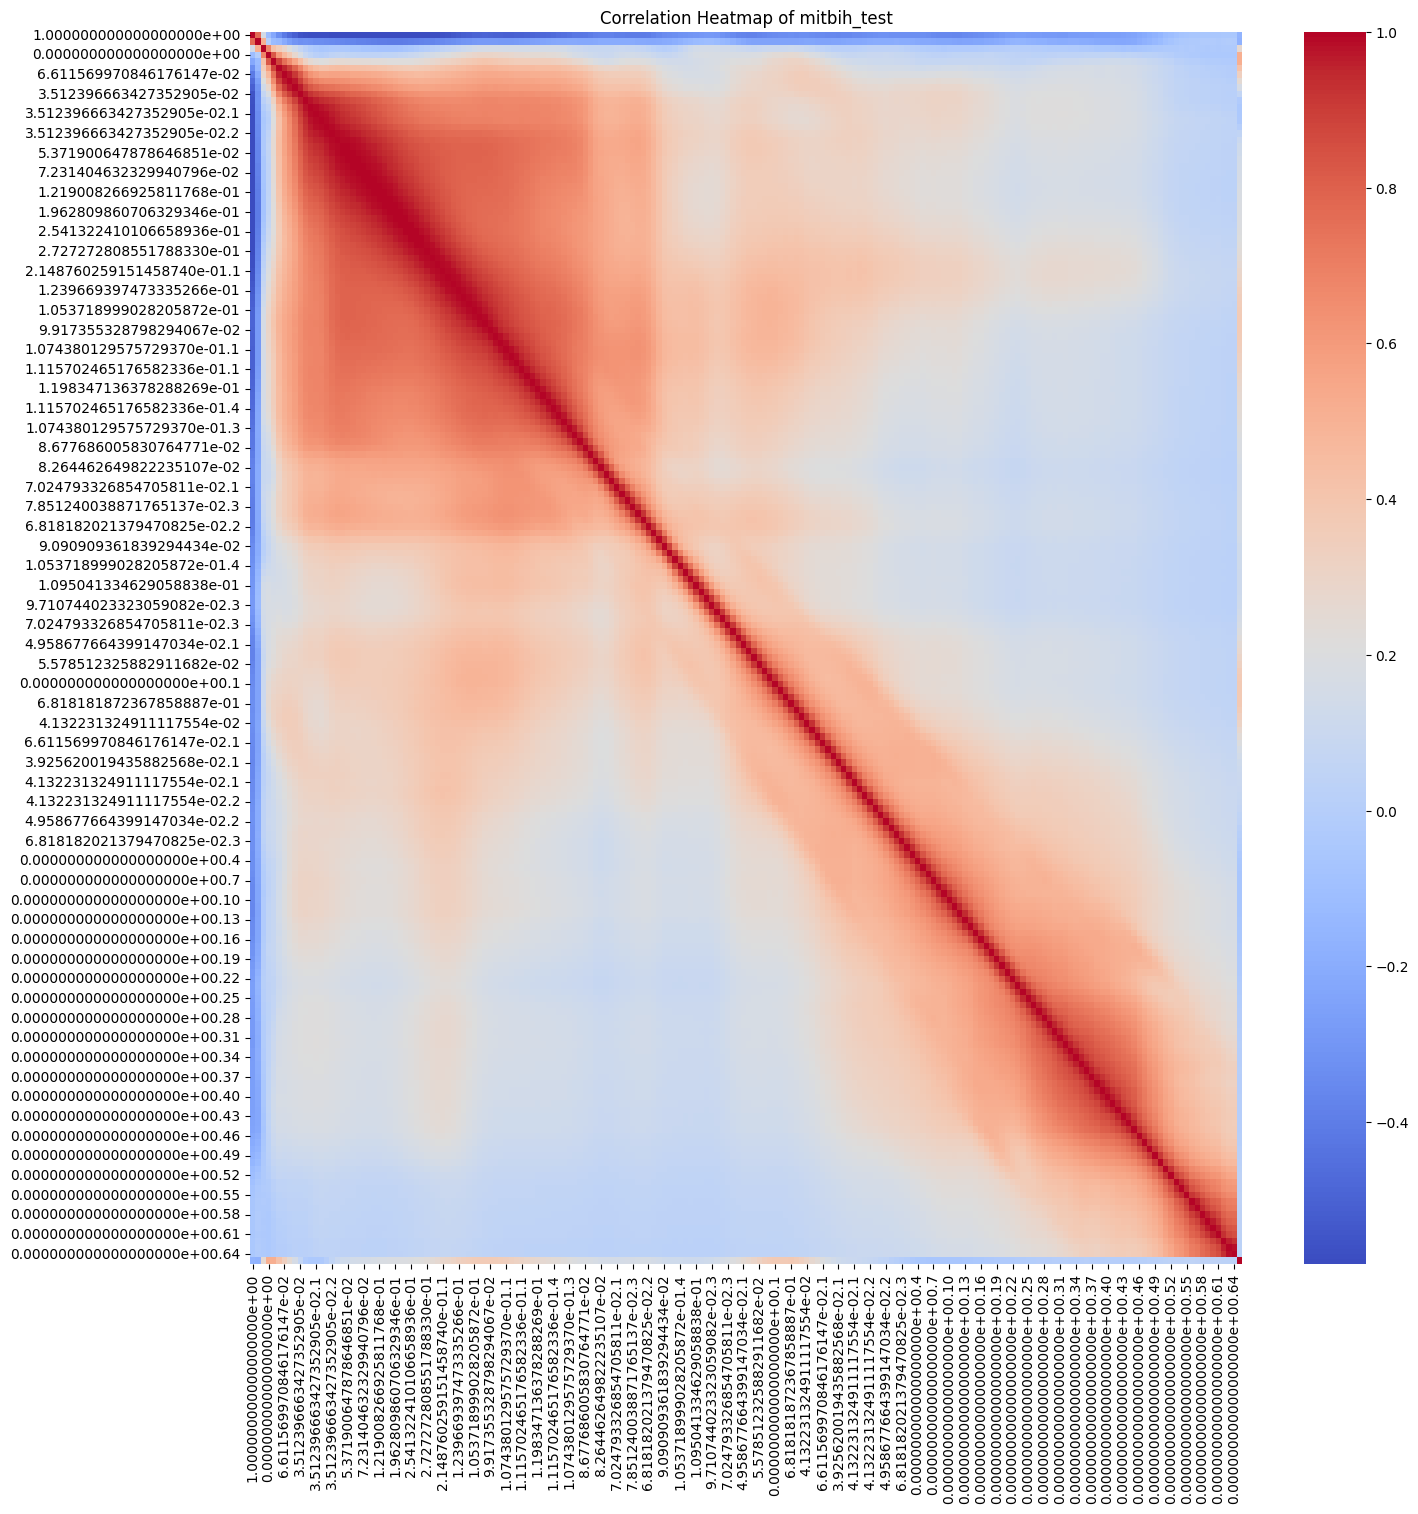

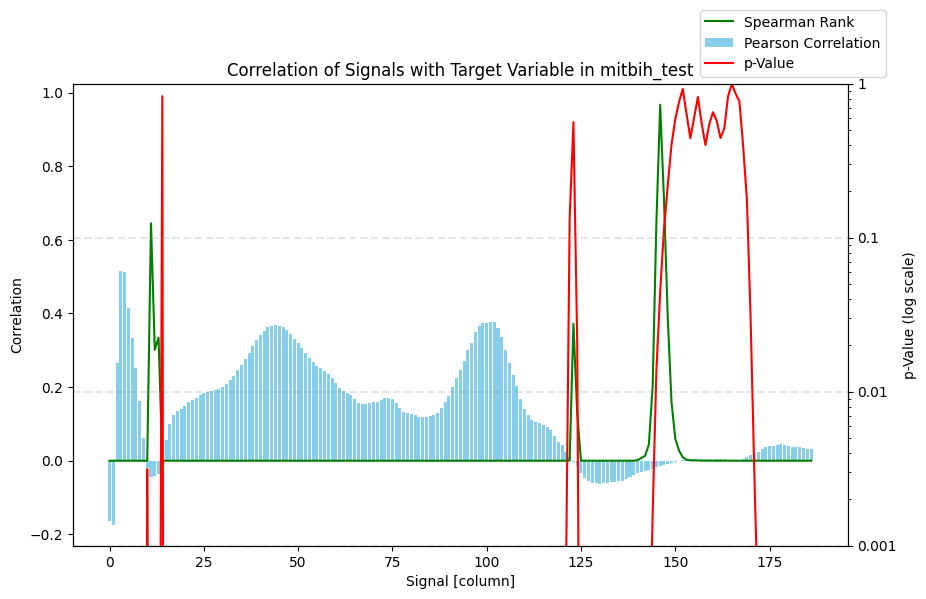

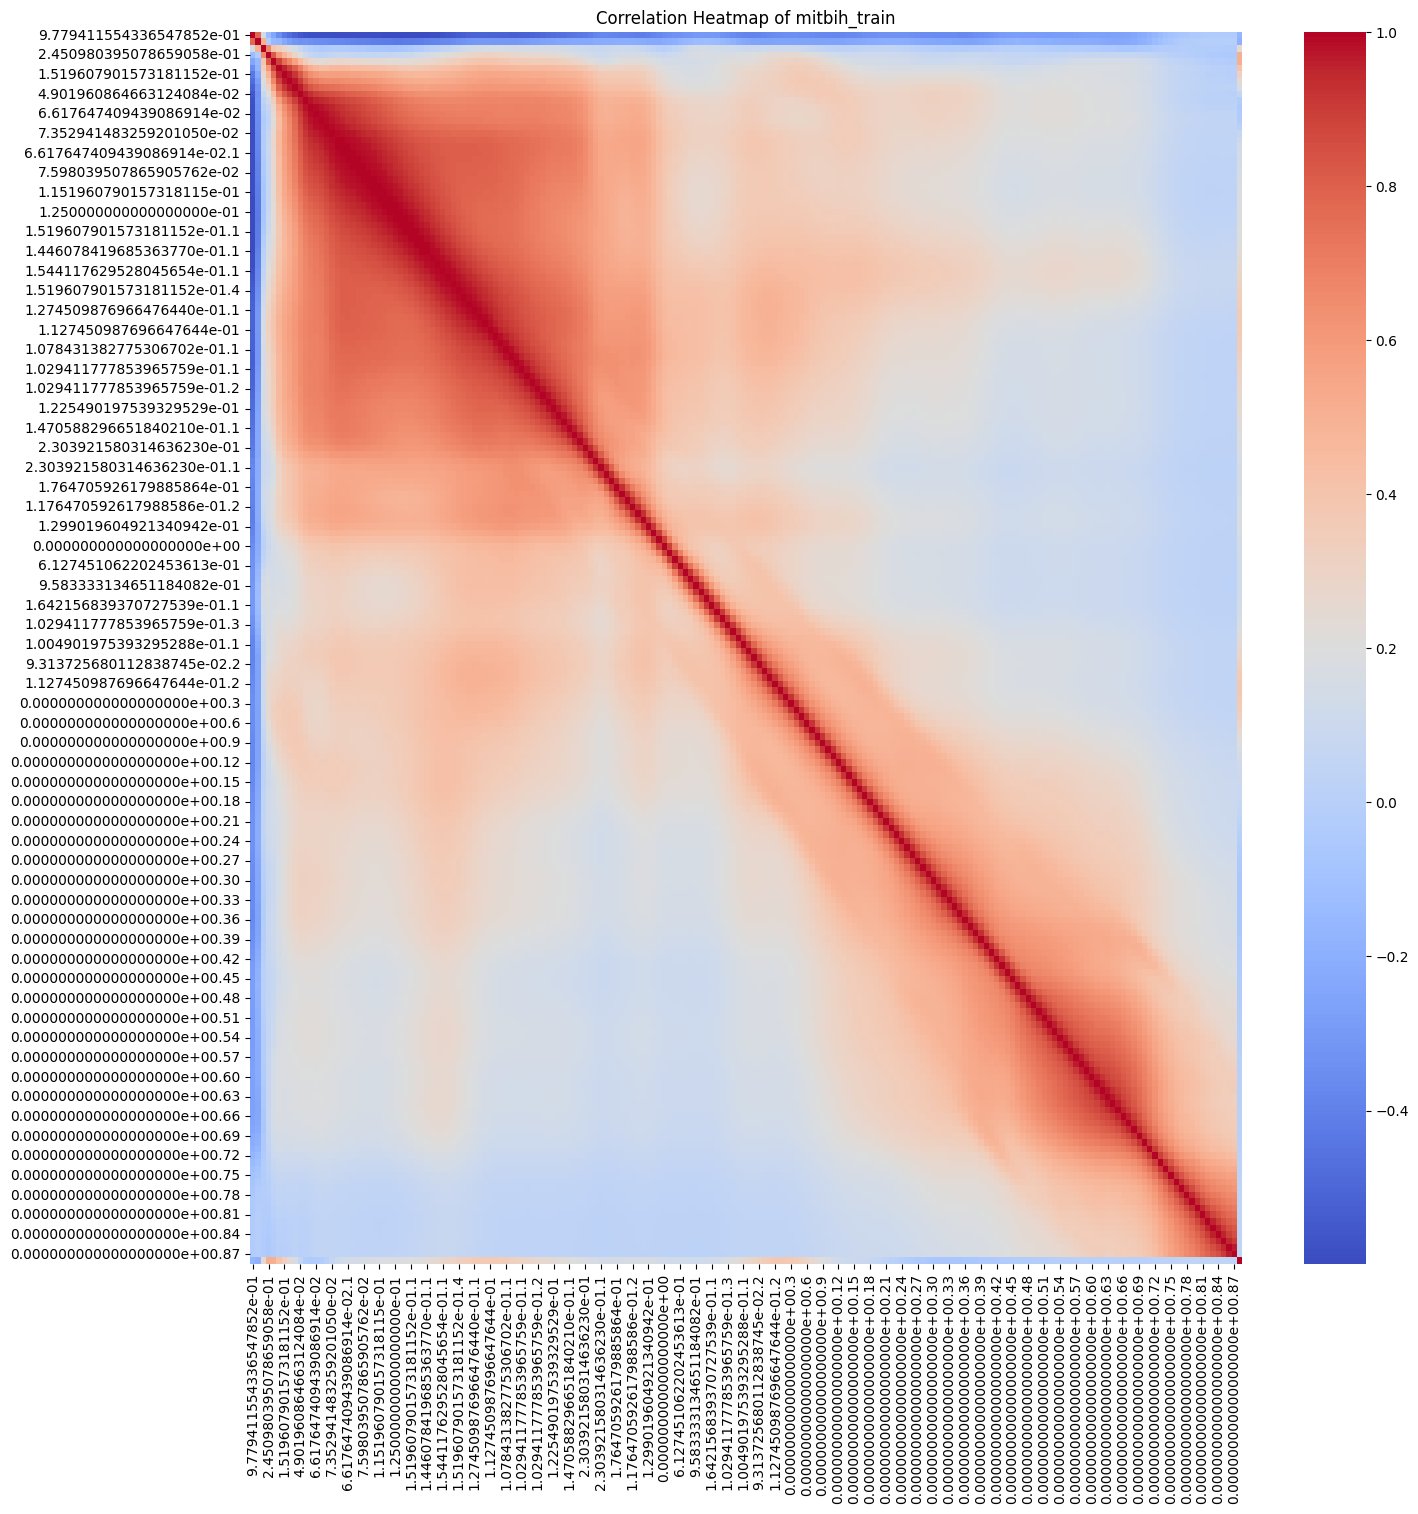

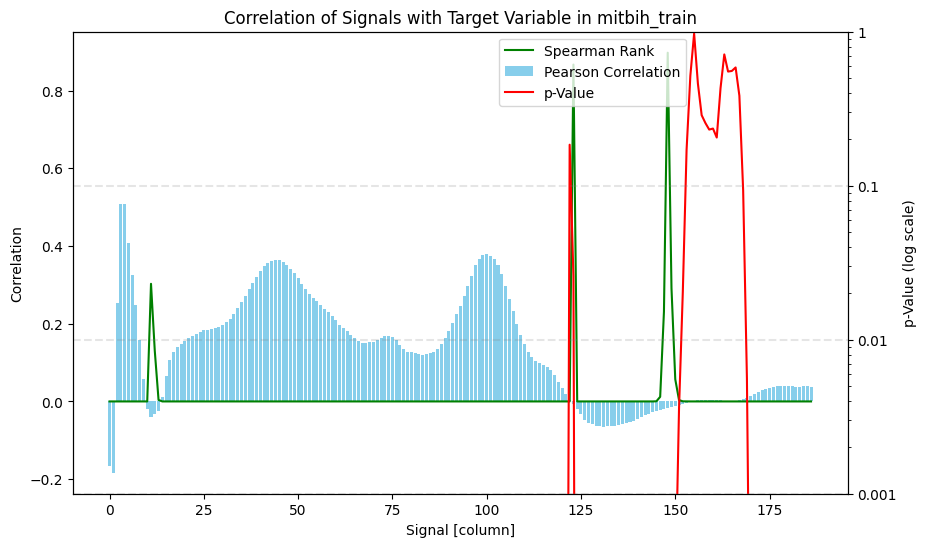

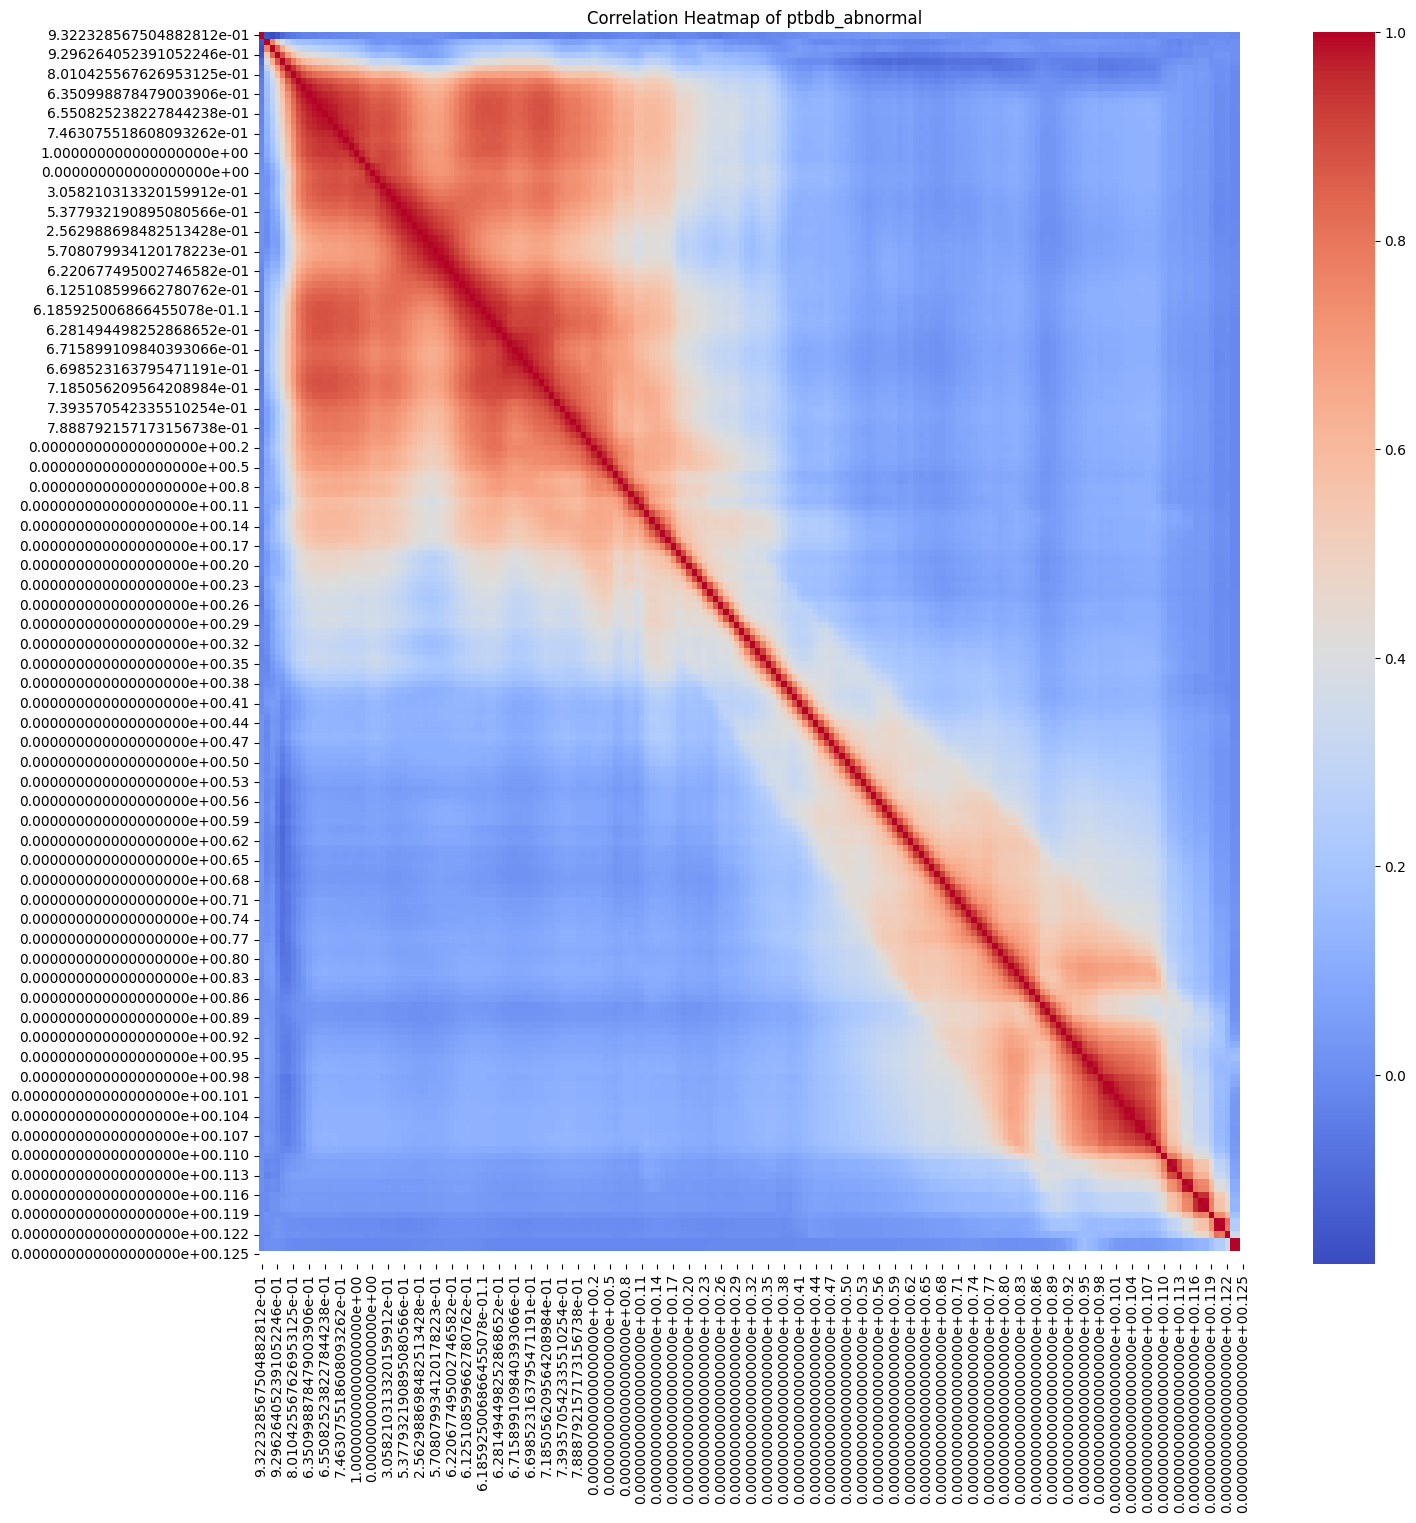

c:\Users\Test\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Users\Test\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


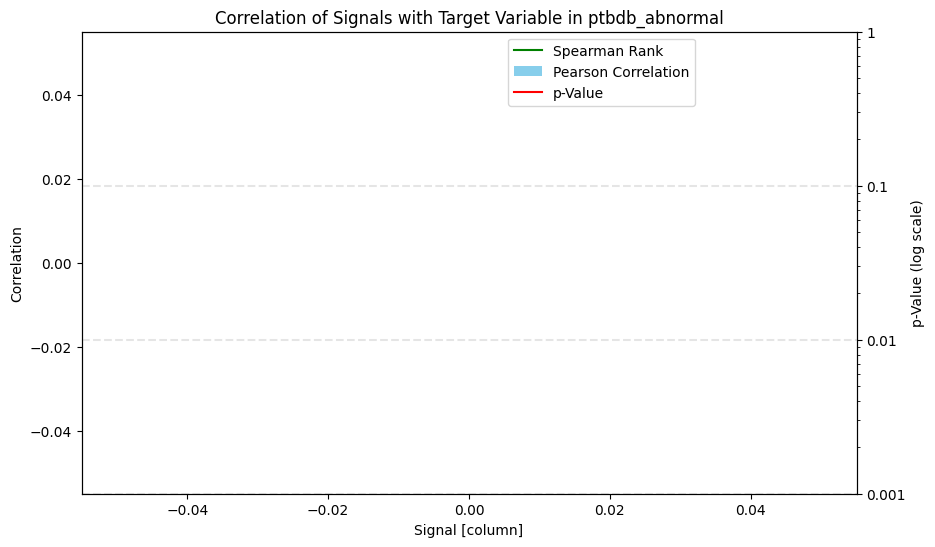

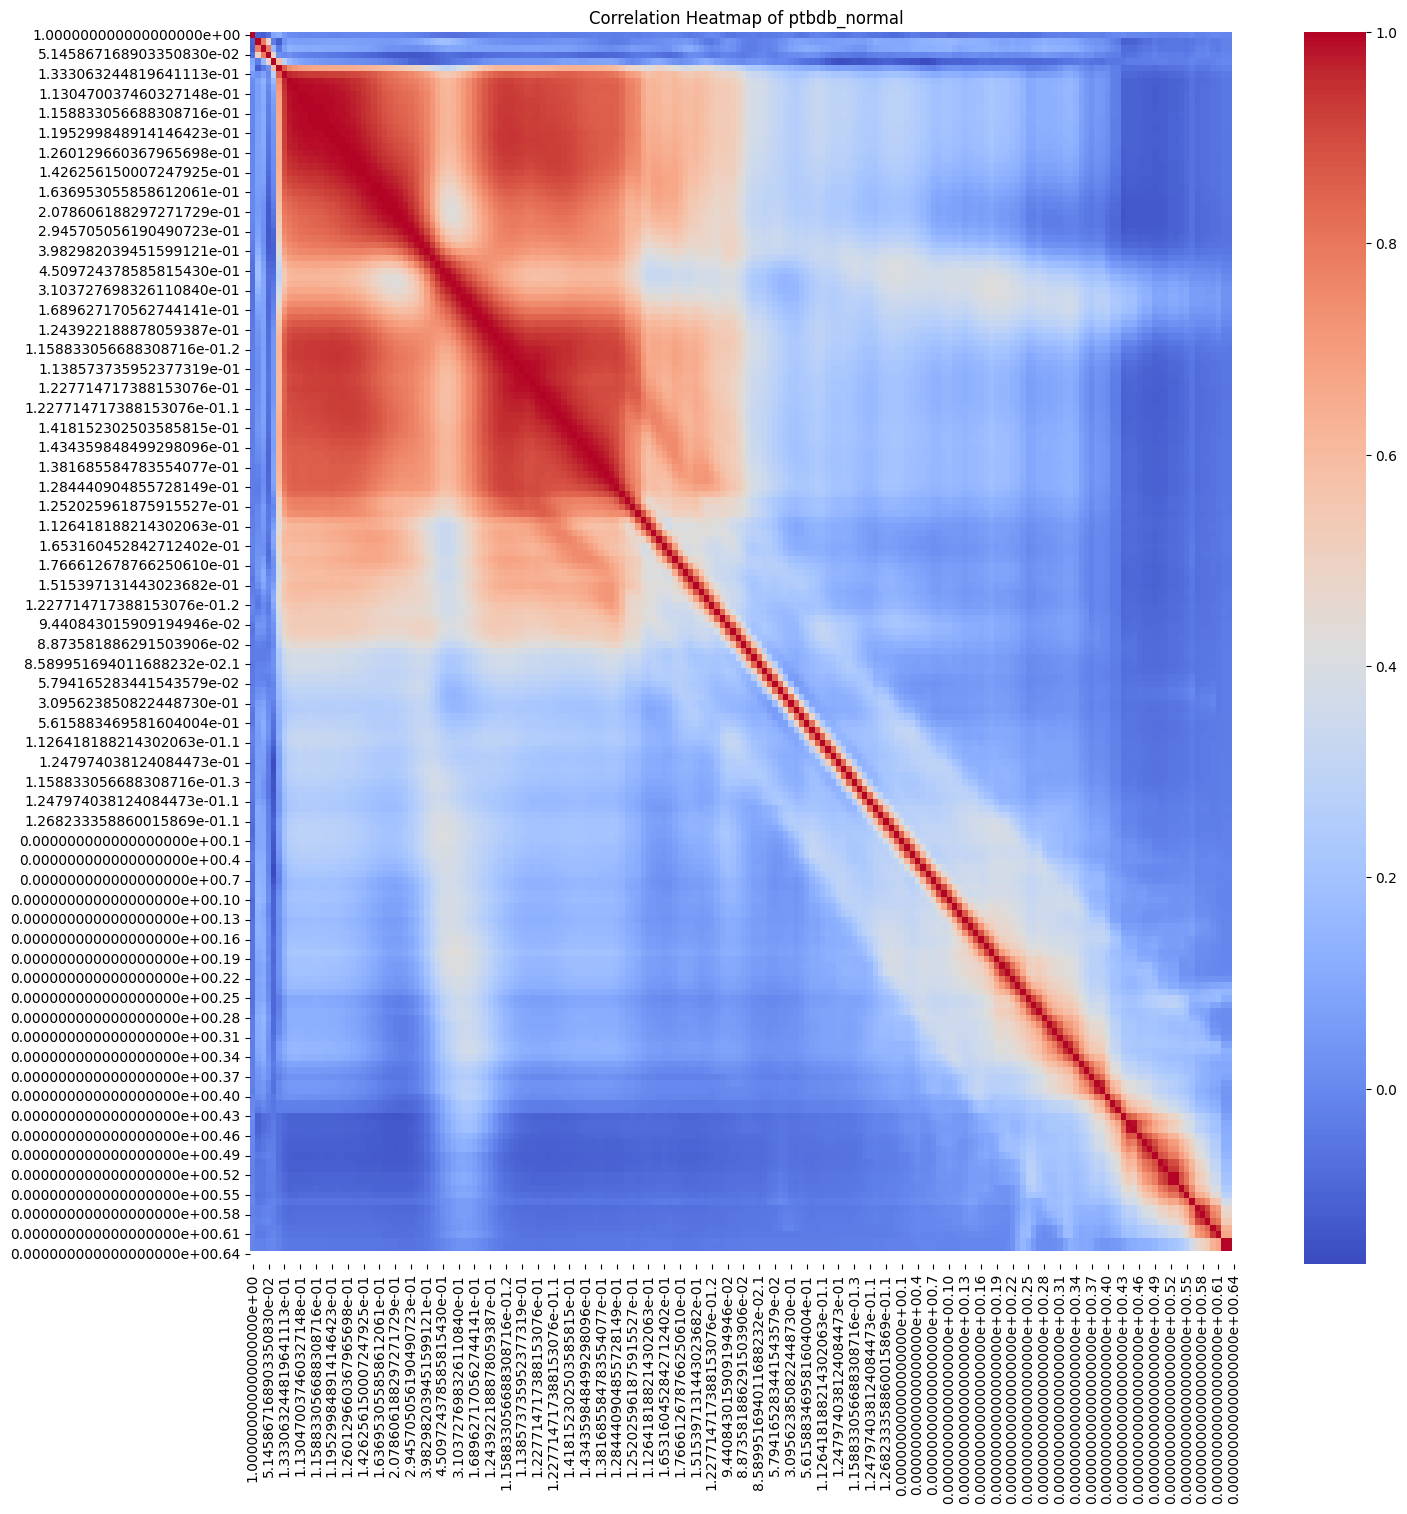

c:\Users\Test\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Users\Test\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


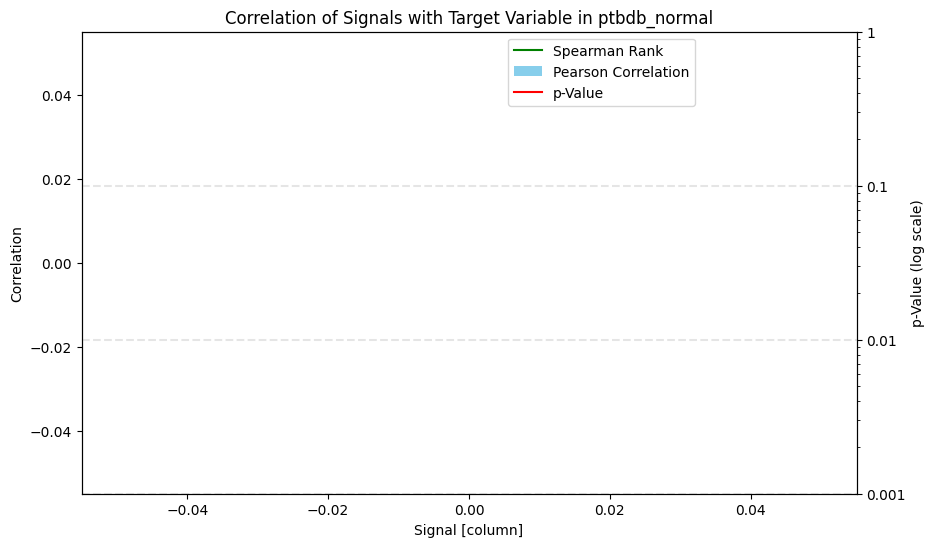

In [11]:
### Tets with function
def analyze_dataframe_corr(df):
    """
    Analyze the given DataFrame.

    Parameters:
        df (DataFrame): The DataFrame to analyze.

    Returns:
        None
    """
    # Use DataFrame name if available, otherwise use variable name
    df_name = df.name if hasattr(df, 'name') and df.name is not None else str([name for name, obj in globals().items() if obj is df][0]);
    # Calculate correlation matrix
    correlation_matrix = df.corr();

    # Plot heatmap of correlation matrix
    plt.figure(figsize=(16, 16));
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f");
    plt.title(f'Correlation Heatmap of {df_name}');
    plt.show();

    # Calculate correlation of each signal with the target variable
    correlation_with_target = df.iloc[:, :-1].corrwith(df.iloc[:, -1]);

    # Calculate p-value and Spearman rank correlation coefficient for each signal with the target variable
    p_values = [];
    spearman_ranks = [];
    for column in df.columns[:-1]:
        pearson_corr, p_value = pearsonr(df[column], df.iloc[:, -1]);
        spearman_corr, spearman_rank = spearmanr(df[column], df.iloc[:, -1]);
        p_values.append(p_value);
        spearman_ranks.append(spearman_rank);

    # Plot the correlation of each signal with the target variable, p-values, and Spearman rank correlation coefficient
    fig, ax1 = plt.subplots(figsize=(10, 6));

    # Create first y-axis for Pearson and Spearman correlations
    ax1.bar(range(len(correlation_with_target)), correlation_with_target, color='skyblue', label='Pearson Correlation');
    ax1.plot(spearman_ranks, color='green', label='Spearman Rank');
    ax1.set_ylabel('Correlation');

    # Create second y-axis for p-values
    ax2 = ax1.twinx();
    ax2.semilogy(p_values, color='red', label='p-Value');
    ax2.set_ylabel('p-Value (log scale)');

    # Set y-axis limits for the second y-axis
    ax2.set_ylim([0.001, 1]);  # Limiting the range from 0.001 to 1

    # Set custom y-ticks for the logarithmic scale
    ax2.set_yticks([0.001, 0.01, 0.1, 1]);
    ax2.set_yticklabels([0.001, 0.01, 0.1, 1]);

    # Add horizontal lines for each y-tick on the logarithmic scale
    for y_tick in [0.001, 0.01, 0.1, 1]:
        ax2.axhline(y=y_tick, color='gray', linestyle='--', alpha=0.2);

    # Set x-axis label and legend
    ax1.set_title(f'Correlation of Signals with Target Variable in {df_name}');
    ax1.set_xlabel('Signal [column]');

    # Combine legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels();
    lines2, labels2 = ax2.get_legend_handles_labels();
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='best', bbox_to_anchor=(0.8, 1));

    plt.show();
    return df;

# examine mitbih_test
analyze_dataframe_corr(mitbih_test);
analyze_dataframe_corr(mitbih_train);

analyze_dataframe_corr(ptbdb_abnormal);
analyze_dataframe_corr(ptbdb_normal);


In [14]:
def visualize_correlation_tests(features_df, targets_series):
    df_name = features_df.name if hasattr(features_df, 'name') and features_df.name is not None else str([name for name, obj in globals().items() if obj is features_df][0]);
    
    # Speichere die Spaltennamen der Features
    feature_names = features_df.columns

    # Speichere die Zielklasse
    target_class = targets_series.name

    # Speichere die p-Werte der beiden Tests für jede Spalte
    p_values_spearman = []
    p_values_kruskal = []

    for feature in feature_names:
        # Führe den Spearman-Rangkorrelationstest durch
        spearman_corr, p_value_spearman = spearmanr(features_df[feature], targets_series)
        p_values_spearman.append(p_value_spearman)

        # Führe den Kruskal-Wallis-H-Test durch
        groups = [features_df[targets_series == cls][feature].values for cls in targets_series.unique()]
        #print("group:", groups)
        _, p_value_kruskal = kruskal(*groups)
        p_values_kruskal.append(p_value_kruskal)

    # Erstelle ein DataFrame mit den p-Werten
    p_values_df = pd.DataFrame({'Feature': feature_names, 'Spearman_p_value': p_values_spearman, 'Kruskal_p_value': p_values_kruskal})

    # Plotte die p-Werte
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=p_values_df, x='Feature', y=p_values_df['Spearman_p_value'], label='Spearman p-value', alpha=0.75)
    sns.lineplot(data=p_values_df, x='Feature', y=p_values_df['Kruskal_p_value'], label='Kruskal p-value', alpha=0.75)
    plt.xlabel('Feature')
    plt.ylabel('p-value')
    #plt.yscale('symlog')  # Verwende eine logarithmische Skala für die y-Achse
    plt.ylim(-0.1, 1.0)  # Setze die y-Achse auf den Bereich von 0.0001 bis 1.0
    plt.title(f'Correlation Tests between Features and Target Class for {df_name}')
    xticks_positions = list(range(0, len(features_df.iloc[0, :]), 10))
    xticks_labels = [str(x) for x in xticks_positions]
    plt.xticks(xticks_positions, xticks_labels, rotation=90)
    plt.legend()
    plt.show()

# Beispielaufruf
#visualize_correlation_tests(X_mitbih_train_a, y_mitbih_train_a)
#visualize_correlation_tests(X_mitbih_train_b, y_mitbih_train_b)
#visualize_correlation_tests(X_mitbih_train_c, y_mitbih_train_c)

visualize_correlation_tests(X_ptbdb_train_a, y_ptbdb_train_a)
visualize_correlation_tests(X_ptbdb_train_b, y_ptbdb_train_b)
visualize_correlation_tests(X_ptbdb_train_c, y_ptbdb_train_c)

group: [array([1.        , 1.        , 1.        , ..., 0.99759734, 1.        ,
       1.        ]), array([0.96024847, 0.9409647 , 1.        , ..., 1.        , 1.        ,
       1.        ])]
group: [array([0.96848899, 0.93934429, 0.53007138, ..., 0.86280632, 0.6570397 ,
       0.9325363 ]), array([0.56956524, 0.96256298, 0.71028036, ..., 0.89829057, 0.83910775,
       0.67190224])]
group: [array([0.50531512, 0.5907104 , 0.29459736, ..., 0.56943774, 0.45788208,
       0.9376601 ]), array([0.2857143 , 0.48380131, 0.23831776, ..., 0.55000001, 0.45989558,
       0.3519488 ])]
group: [array([0.27980259, 0.40491804, 0.00917431, ..., 0.46444017, 0.33874848,
       0.51238257]), array([0.13229814, 0.21166307, 0.12149533, ..., 0.28675213, 0.18557191,
       0.18906341])]
group: [array([0.21488231, 0.30765027, 0.        , ..., 0.3567996 , 0.29121539,
       0.        ]), array([0.10993789, 0.02807775, 0.0625    , ..., 0.09188034, 0.20408164,
       0.19371727])]
group: [array([0.12832195, 0.2

group: [array([0.13515566, 0.05355191, 0.        , ..., 0.2496396 , 0.3188929 ,
       0.        ]), array([0.08260869, 0.24766019, 0.10397197, ..., 0.19188035, 0.        ,
       0.17277487])]
group: [array([0.12034928, 0.06939891, 0.        , ..., 0.47044691, 0.33754513,
       0.        ]), array([0.0689441 , 0.24550036, 0.125     , ..., 0.20512821, 0.        ,
       0.16230367])]
group: [array([0.06909643, 0.08961748, 0.        , ..., 0.59034121, 0.32851985,
       0.        ]), array([0.08260869, 0.24694024, 0.10338785, ..., 0.22222222, 0.        ,
       0.18499127])]
group: [array([0.0246773 , 0.07377049, 0.        , ..., 0.78279674, 0.32129964,
       0.        ]), array([0.09068323, 0.25053996, 0.12908879, ..., 0.22735043, 0.        ,
       0.15241419])]
group: [array([0.03530752, 0.09508197, 0.        , ..., 0.9884671 , 0.35980746,
       0.        ]), array([0.0795031 , 0.24550036, 0.12266355, ..., 0.26239318, 0.        ,
       0.14950553])]
group: [array([0.01518603, 0.0

c:\Users\Test\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


ValueError: All numbers are identical in kruskal

### 3.3) Identification of outliers
we identify outliers using a simple Z-score function: values greater 3 or smaller -3 are scored as outliers and summed for each column of a df. The list of Z-scores is plottet against the columns of the df.
all other methods are too time and calculation power consuming.

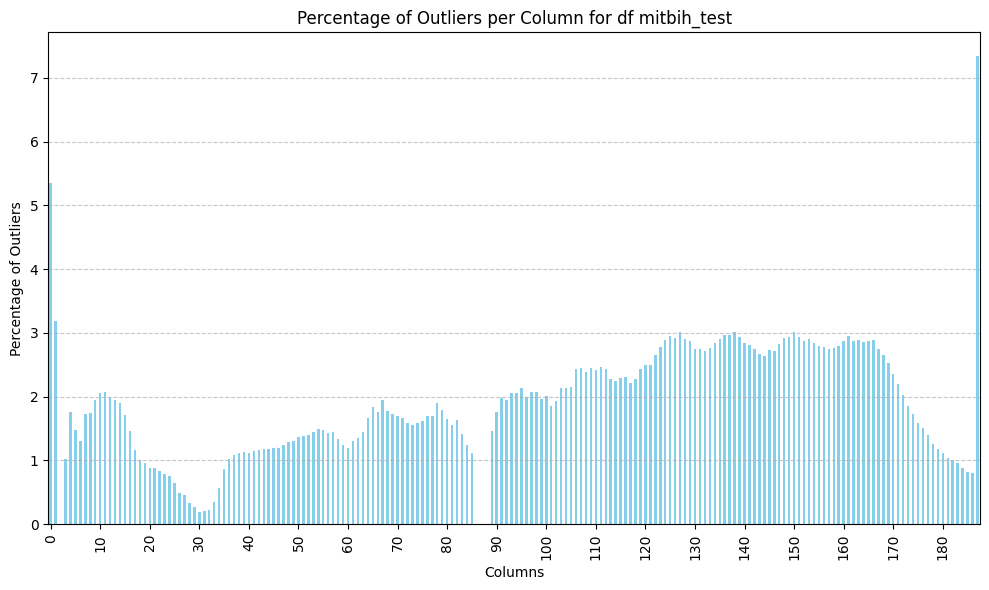

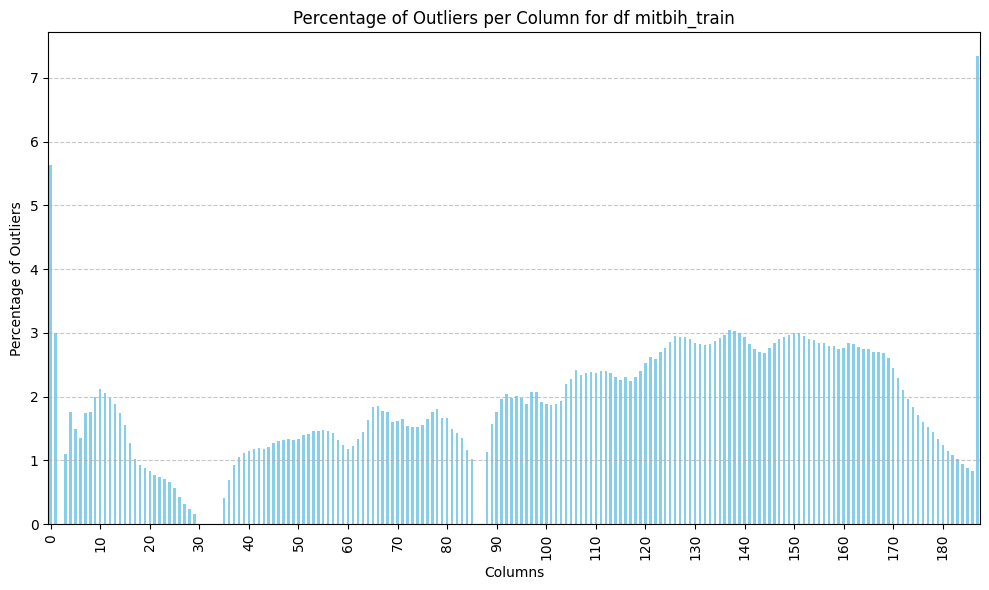

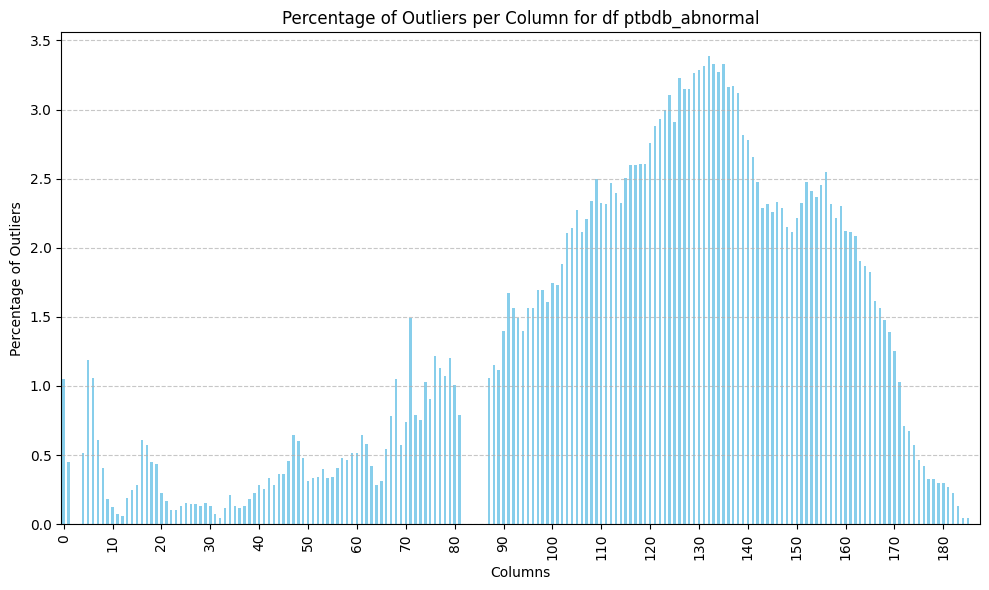

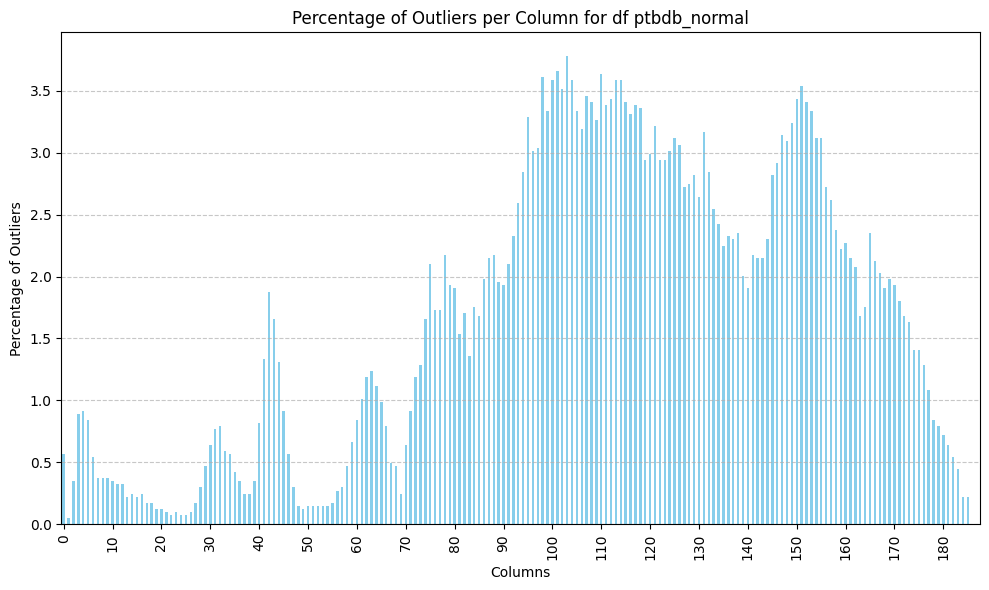

In [12]:
def plot_outliers(df):
    """
    Compute Z-scores for each column of the DataFrame and plot the percentage of outliers per column.

    Parameters:
        df (DataFrame): The DataFrame containing the data.

    Returns:
        None
    """
    df_name = df.name if hasattr(df, 'name') and df.name is not None else str([name for name, obj in globals().items() if obj is df][0]);
    # Compute Z-scores for each column
    z_scores = (df - df.mean()) / df.std()

    # Identify outliers with Z-score greater than 3 or less than -3
    outliers = (z_scores > 3) | (z_scores < -3)

    # Compute the percentage of outliers for each column
    #outliers_percentage = outliers.mean() * 100
    outliers_percentage = outliers.sum() / len(df) *100 #way faster

    # Plot the percentage of outliers for each column
    plt.figure(figsize=(10, 6))
    outliers_percentage.plot(kind='bar', color='skyblue')
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Outliers')
    plt.title(f'Percentage of Outliers per Column for df {df_name}')
    xticks_positions = list(range(0, len(df.iloc[0, :]), 10))
    xticks_labels = [str(x) for x in xticks_positions]
    plt.xticks(xticks_positions, xticks_labels, rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


plot_outliers(mitbih_test)
plot_outliers(mitbih_train)
plot_outliers(ptbdb_abnormal)
plot_outliers(ptbdb_normal)

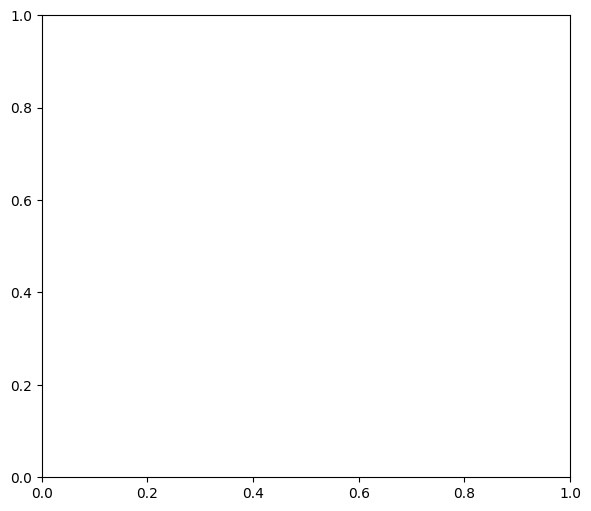

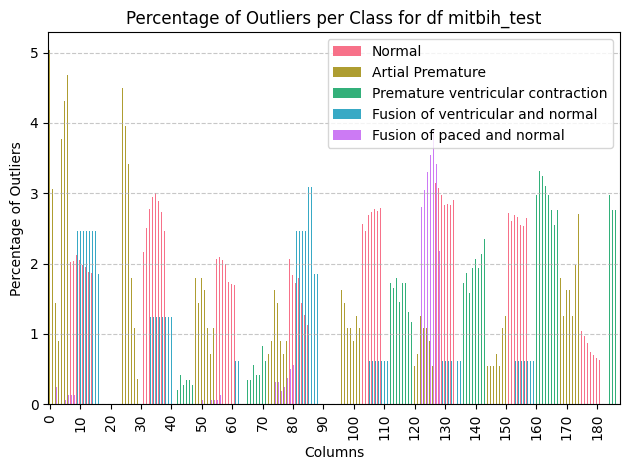

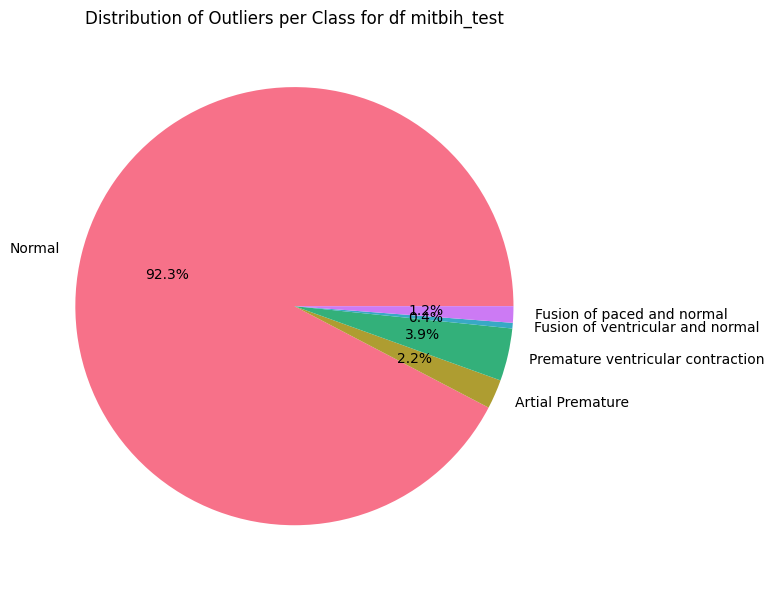

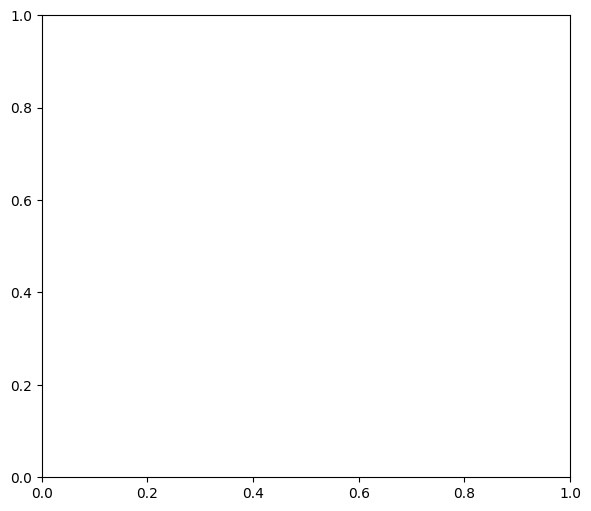

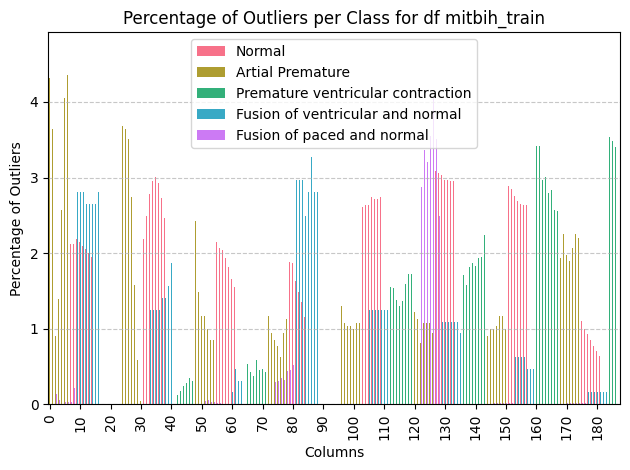

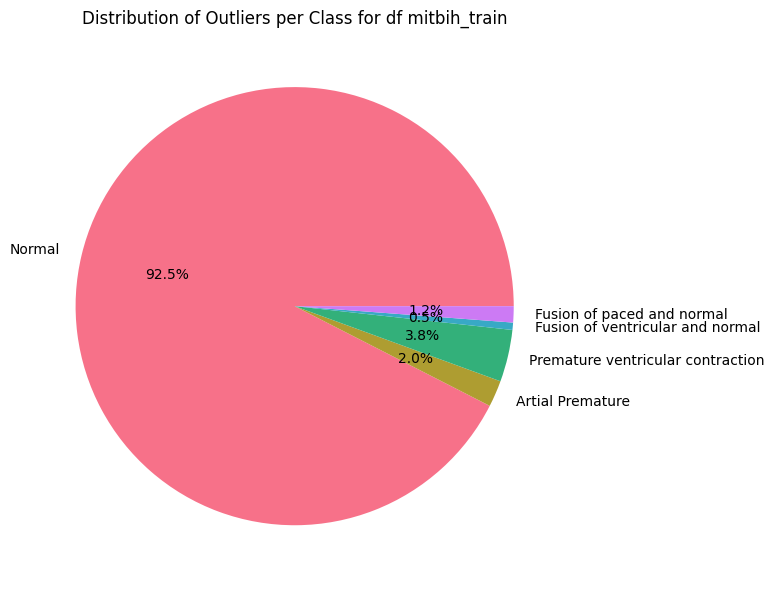

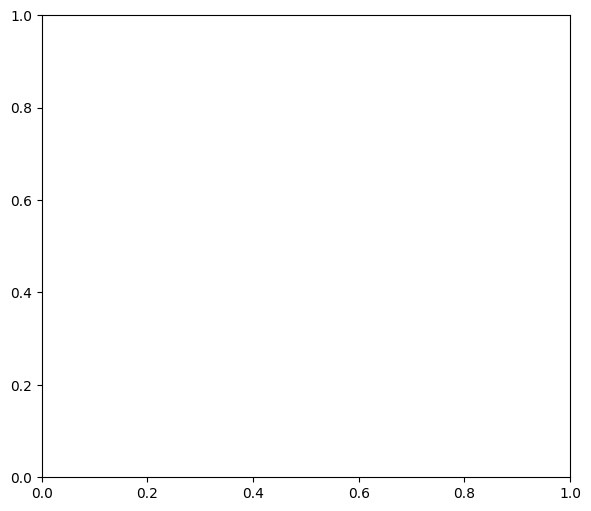

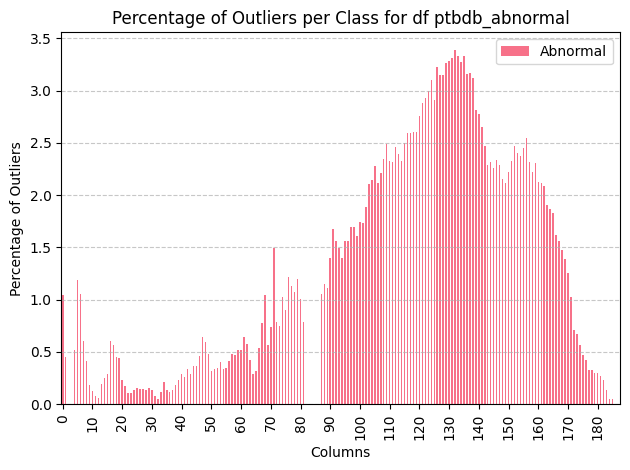

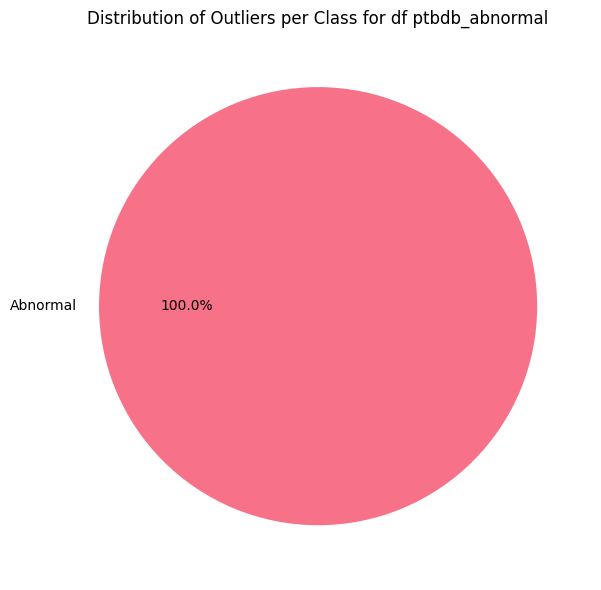

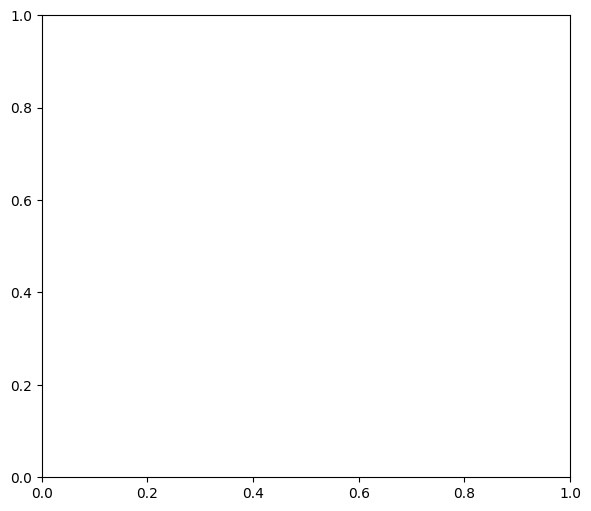

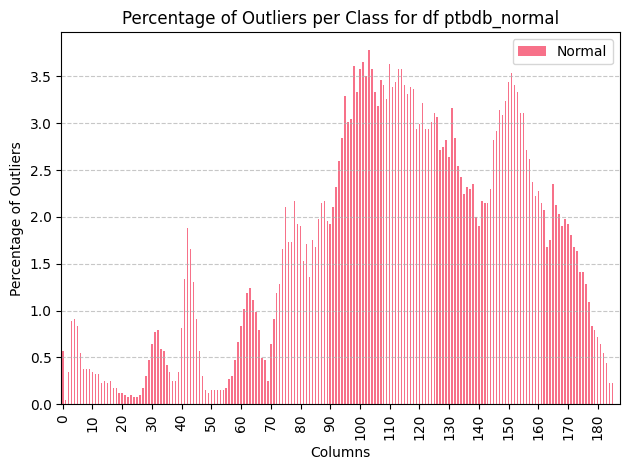

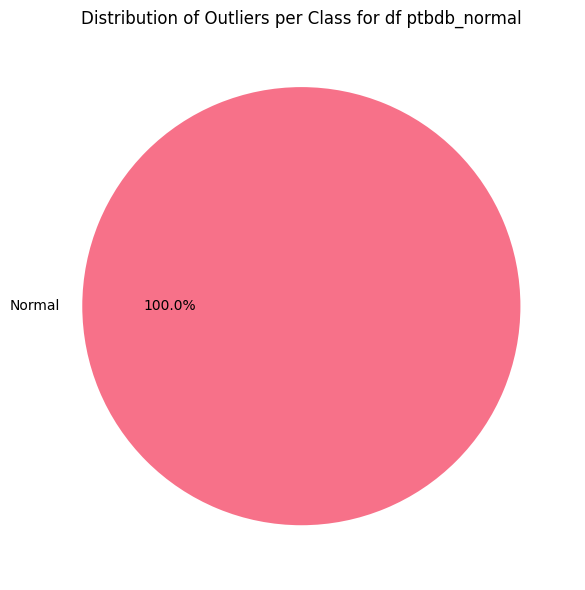

In [16]:
# Z-Score function with classes and pie-chart for all classes
def plot_outliers_classes(df, id_to_label=None):
    """
    Compute Z-scores for each column of the DataFrame, plot the percentage of outliers per class,
    and display a pie chart with the total number of outliers per class.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        id_to_label (dict): A dictionary mapping class IDs to class labels.

    Returns:
        None
    """
    df_name = df.name if hasattr(df, 'name') and df.name is not None else str([name for name, obj in globals().items() if obj is df][0]);
    # Extract class labels from the last column
    class_labels = df.iloc[:, -1] # Für jede Zeile wird ausgegeben, zu welcher Klasse diese Zeile gehört.
    
    # Initialize an empty DataFrame to store outlier percentages for each class
    outliers_percentage_by_class = pd.DataFrame()
    total_outliers_per_class = pd.DataFrame()
    # Define a color palette for each class
    class_colors = sns.color_palette('husl', n_colors=len(class_labels.unique()))

    # Compute outliers percentage for each class
    for class_label in class_labels.unique():
        # Filter dataframe rows by class label
        class_df = df[class_labels == class_label]
        
        # Compute Z-scores for each column of the class DataFrame
        z_scores = (class_df - class_df.mean()) / class_df.std() 
        
        # Identify outliers with Z-score greater than 3 or less than -3
        outliers = (z_scores > 3) | (z_scores < -3) 
        
        # Compute the percentage of outliers for each column
        outliers_percentage = outliers.sum() / len(class_df) * 100 
        
        total_outliers = outliers.sum()
        total_outliers_per_class[class_label] = total_outliers
        
        # Store outliers percentage for the current class in the DataFrame
        outliers_percentage_by_class[class_label] = outliers_percentage
    
    # Sum the total number of outliers for each class
    total_outliers_per_class_sum = total_outliers_per_class.sum()
    
    # Plot the percentage of outliers for each class using the defined color palette
    plt.figure(figsize=(15, 6))

    # Plot the percentage of outliers for each class
    plt.subplot(1, 2, 1)
    if id_to_label:
        outliers_percentage_by_class.columns = [id_to_label[column] for column in outliers_percentage_by_class.columns]
    outliers_percentage_by_class.plot(kind='bar', color=class_colors)
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Outliers')
    plt.title(f'Percentage of Outliers per Class for df {df_name}')
    xticks_positions = list(range(0, len(df.iloc[0, :]), 10))
    xticks_labels = [str(x) for x in xticks_positions]
    plt.xticks(xticks_positions, xticks_labels, rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

    # Plot a pie chart with the total number of outliers per class
    plt.figure(figsize=(10, 6))
    if id_to_label:
        class_labels = [id_to_label[class_label] for class_label in total_outliers_per_class_sum.index]
    plt.pie(total_outliers_per_class_sum, labels=class_labels, autopct='%1.1f%%', colors=class_colors) 
    plt.title(f'Distribution of Outliers per Class for df {df_name}')

    plt.tight_layout()
    plt.show()


id_to_label_mit = {
        0: "Normal",
        1: "Artial Premature",
        2: "Premature ventricular contraction",
        3: "Fusion of ventricular and normal",
        4: "Fusion of paced and normal"
    }

id_to_label_pt = {
        0: "Normal",
        1: "Abnormal"
    }
plot_outliers_classes(mitbih_test, id_to_label_mit)
plot_outliers_classes(mitbih_train, id_to_label_mit)
plot_outliers_classes(ptbdb_abnormal, id_to_label_pt)
plot_outliers_classes(ptbdb_normal, id_to_label_pt)


#This is not working right now, because the transformed datasets have no target column (in X_dataframes...)
#plot_outliers_classes(X_mitbih_train_a, id_to_label_mit)
#plot_outliers_classes(X_mitbih_train_b, id_to_label_mit)

In [64]:
# Use IsolationForest for outlier detection
from sklearn.ensemble import IsolationForest

def plot_outliers_classes_if(df, id_to_label=None):
    """
    Compute outliers using Isolation Forest for each class of the DataFrame, plot the percentage of outliers per class,
    and display a pie chart with the total number of outliers per class.
    Fitting is done on complete Dataset, prediction is done on single classes.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        id_to_label (dict): A dictionary mapping class IDs to class labels.

    Returns:
        None
    """
    df_name = df.name if hasattr(df, 'name') and df.name is not None else str([name for name, obj in globals().items() if obj is df][0])
    # Extract class labels from the last column
    class_labels = df.iloc[:, -1] 
    
    # Initialize an empty DataFrame to store outlier percentages for each class
    outliers_percentage_by_class = pd.DataFrame(index=range(len(df.columns)), columns=class_labels.unique()) # 
    total_outliers_per_class = pd.DataFrame(index=[0], columns=class_labels.unique()) #index=range(len(df.columns)), 
    # Define a color palette for each class
    class_colors = sns.color_palette('husl', n_colors=len(class_labels.unique()))

    # Initialize Isolation Forest
    isolation_forest = IsolationForest(random_state=42)
        
    
    # Compute outliers percentage for each class
    for class_label in class_labels.unique():
        # Filter dataframe rows by class label
        class_df = df[class_labels == class_label]
        
        # Initialize lists to store outliers and outliers percentages for each column
        outliers_list = []
        outliers_percentage_list = []
        
        # Iterate over each column (excluding the target column)
        for col in range(len(class_df.columns) - 1):  # Exclude the last column (target)
            # Fit Isolation Forest model on the current column
            isolation_forest_col = IsolationForest(random_state=42)
            isolation_forest_col.fit(class_df.iloc[:, col].values.reshape(-1, 1))  # Reshape for single feature
            
            # Predict outliers for the current column
            outliers_col = isolation_forest_col.predict(class_df.iloc[:, col].values.reshape(-1, 1))
            
            # Compute the percentage of outliers for the current column
            outliers_percentage_col = (outliers_col == -1).sum() / len(class_df) * 100
            
            # Append results to lists
            outliers_list.append(outliers_col)
            outliers_percentage_list.append(outliers_percentage_col)
        
        # Concatenate results for all columns
        outliers = np.concatenate(outliers_list, axis=1)
        outliers_percentage = np.array(outliers_percentage_list)
        
        # Compute total outliers
        total_outliers = (outliers == -1).sum()
        
        # Store total outliers for the current class
        total_outliers_per_class[class_label] = total_outliers
        
        # Store outliers percentage for the current class
        outliers_percentage_by_class[class_label] = outliers_percentage
    
    # Sum the total number of outliers for each class
    total_outliers_per_class_sum = total_outliers_per_class.sum()
    print("total_outliers_per_class_sum")
    display(total_outliers_per_class_sum)
    print("total_percentage_by_class")
    display(outliers_percentage_by_class)
    # Plot the percentage of outliers for each class using the defined color palette
    plt.figure(figsize=(15, 6))

    # Plot the percentage of outliers for each class
    plt.subplot(1, 2, 1)
    if id_to_label:
        outliers_percentage_by_class.columns = [id_to_label[column] for column in outliers_percentage_by_class.columns]
    outliers_percentage_by_class.plot(kind='bar', color=class_colors)
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Outliers')
    plt.title(f'Percentage of Outliers per Class for df {df_name}')
    xticks_positions = list(range(0, len(df.iloc[0, :]), 10))
    xticks_labels = [str(x) for x in xticks_positions]
    plt.xticks(xticks_positions, xticks_labels, rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

    # Plot a pie chart with the total number of outliers per class
    plt.figure(figsize=(10, 6))
    if id_to_label:
        class_labels = [id_to_label[class_label] for class_label in total_outliers_per_class_sum.index]
    plt.pie(total_outliers_per_class_sum, labels=class_labels, autopct='%1.1f%%', colors=class_colors) 
    plt.title(f'Distribution of Outliers per Class for df {df_name}')

    plt.tight_layout()
    plt.show()


id_to_label_mit = {
        0: "Normal",
        1: "Artial Premature",
        2: "Premature ventricular contraction",
        3: "Fusion of ventricular and normal",
        4: "Fusion of paced and normal"
    }

id_to_label_pt = {
        0: "Normal",
        1: "Abnormal"
    }
plot_outliers_classes_if(mitbih_test, id_to_label_mit)
plot_outliers_classes_if(mitbih_train, id_to_label_mit)
plot_outliers_classes_if(ptbdb_abnormal, id_to_label_pt)
plot_outliers_classes_if(ptbdb_normal, id_to_label_pt)

AxisError: axis 1 is out of bounds for array of dimension 1

#### FIrst interpreation of random forest (remove later):
--> This should be infinitely more accurate than z-score or percentiles, because we train the model on the whole dataframe and do not only compare one column each time.
--> But it is not, as we can see in ptdbd data: if we train on complete dataset, we do have the same outliers everywhere, this is because the model is trained on the same dataset that is used for
identification.
--> We make the mistake of training on all columns, which represent entirely different timesteps.

--> We better use z-scores and percentiles.
    --> Percentiles should be the best thing, because it is easy interpretable and calculates the outliers for each column, which is fitting in our case.
-the isolation forest model could be useful, but we should understand exactly how it predicts the outliers ()

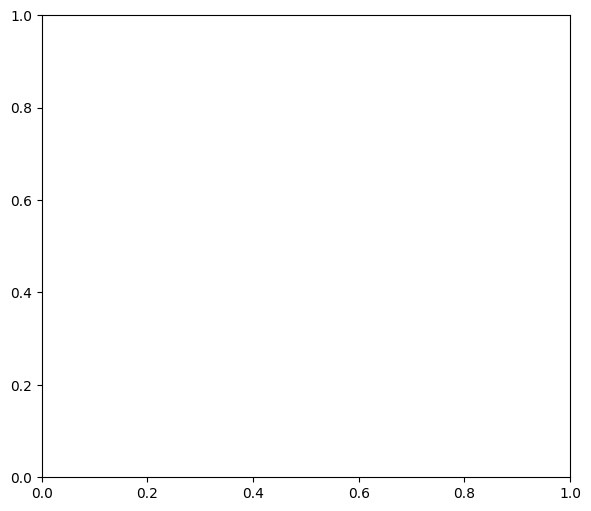

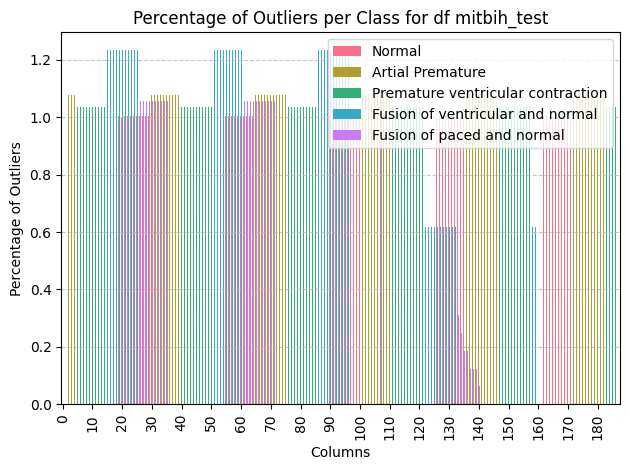

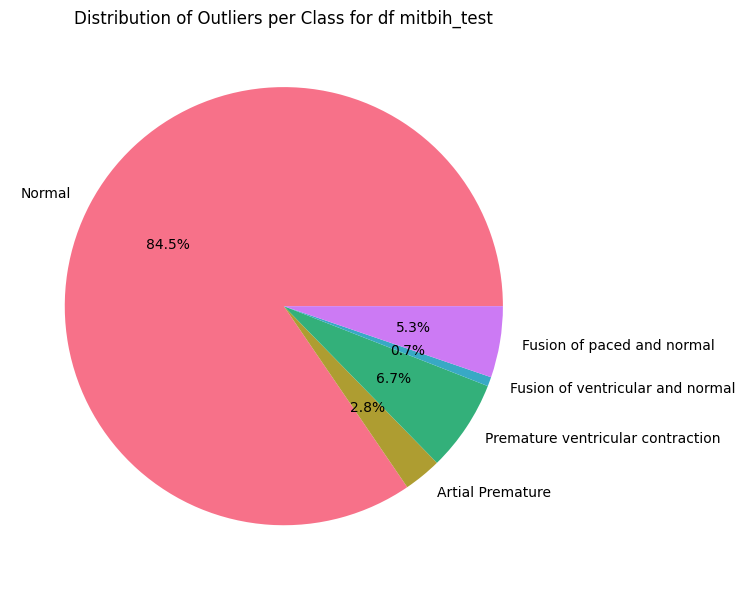

In [70]:
###Percentile FUnction (like z-score function)
def plot_outliers_classes_percentile(df, id_to_label=None, percentile=95):
    """
    Compute outliers for each column of the DataFrame based on percentiles, 
    plot the percentage of outliers per class, and display a pie chart 
    with the total number of outliers per class.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        id_to_label (dict): A dictionary mapping class IDs to class labels.
        percentile (int, optional): The percentile threshold for identifying outliers. Default is 95.

    Returns:
        None
    """
    df_name = df.name if hasattr(df, 'name') and df.name is not None else str([name for name, obj in globals().items() if obj is df][0])
    
    # Extract class labels from the last column
    class_labels = df.iloc[:, -1]
    
    # Initialize an empty DataFrame to store outlier percentages for each class
    outliers_percentage_by_class = pd.DataFrame()
    total_outliers_per_class = pd.DataFrame()
    
    # Define a color palette for each class
    class_colors = sns.color_palette('husl', n_colors=len(class_labels.unique()))
    
    # Compute outliers percentage for each class
    for class_label in class_labels.unique():
        # Filter dataframe rows by class label
        class_df = df[class_labels == class_label]
        
        # Compute percentile threshold for each column
        percentile_values = class_df.quantile(q=(100 - percentile) / 100)
                # Identify outliers based on percentile threshold
        outliers = class_df > percentile_values
        
        # Compute the percentage of outliers for each column
        outliers_percentage = outliers.sum() / len(class_df) * 100
        
        total_outliers = outliers.sum()
        total_outliers_per_class[class_label] = total_outliers
        
        # Store outliers percentage for the current class in the DataFrame
        outliers_percentage_by_class[class_label] = outliers_percentage
    
    # Sum the total number of outliers for each class
    total_outliers_per_class_sum = total_outliers_per_class.sum()
    
    # Plot the percentage of outliers for each class using the defined color palette
    plt.figure(figsize=(15, 6))

    # Plot the percentage of outliers for each class
    plt.subplot(1, 2, 1)
    if id_to_label:
        outliers_percentage_by_class.columns = [id_to_label[column] for column in outliers_percentage_by_class.columns]
    outliers_percentage_by_class.plot(kind='bar', color=class_colors)
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Outliers')
    plt.title(f'Percentage of Outliers per Class for df {df_name}')
    xticks_positions = list(range(0, len(df.iloc[0, :]), 10))
    xticks_labels = [str(x) for x in xticks_positions]
    plt.xticks(xticks_positions, xticks_labels, rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

    # Plot a pie chart with the total number of outliers per class
    plt.figure(figsize=(10, 6))
    if id_to_label:
        class_labels = [id_to_label[class_label] for class_label in total_outliers_per_class_sum.index]
    plt.pie(total_outliers_per_class_sum, labels=class_labels, autopct='%1.1f%%', colors=class_colors) 
    plt.title(f'Distribution of Outliers per Class for df {df_name}')

    plt.tight_layout()
    plt.show()


id_to_label_mit = {
        0: "Normal",
        1: "Artial Premature",
        2: "Premature ventricular contraction",
        3: "Fusion of ventricular and normal",
        4: "Fusion of paced and normal"
    }

id_to_label_pt = {
        0: "Normal",
        1: "Abnormal"
    }


plot_outliers_classes_percentile(mitbih_test, id_to_label_mit, percentile=1)
# plot_outliers_classes_percentile(mitbih_train, id_to_label_mit, percentile=95)
# plot_outliers_classes_percentile(ptbdb_abnormal, id_to_label_pt, percentile=95)
# plot_outliers_classes_percentile(ptbdb_normal, id_to_label_pt, percentile=95)

#this function is not working for the X and y separated dataframes and needs rework (or concatetantion of X and y after resampling, just for the plots...)

# Preprocessing

## MITBIH-Datasets:

We can use directly the train set and allocate it to a new variable mitbih_train_a. We have to split the dataframe in X and y for these purpoeses (at least for packages from imblearn). Also we might use a different approach, where only the train set is rebalanced to exakt values (package resample from sklearn.utils). But for now, we use only the learned approaches from the course.
We do not touch the test set!

## PTDBD-Datasets:
Since we do not have a test and train set, we do have to combine the original datasets first, shuffle them in a random order, then generate Test and Train sets and then perform RandomOver- and UnderSampling.


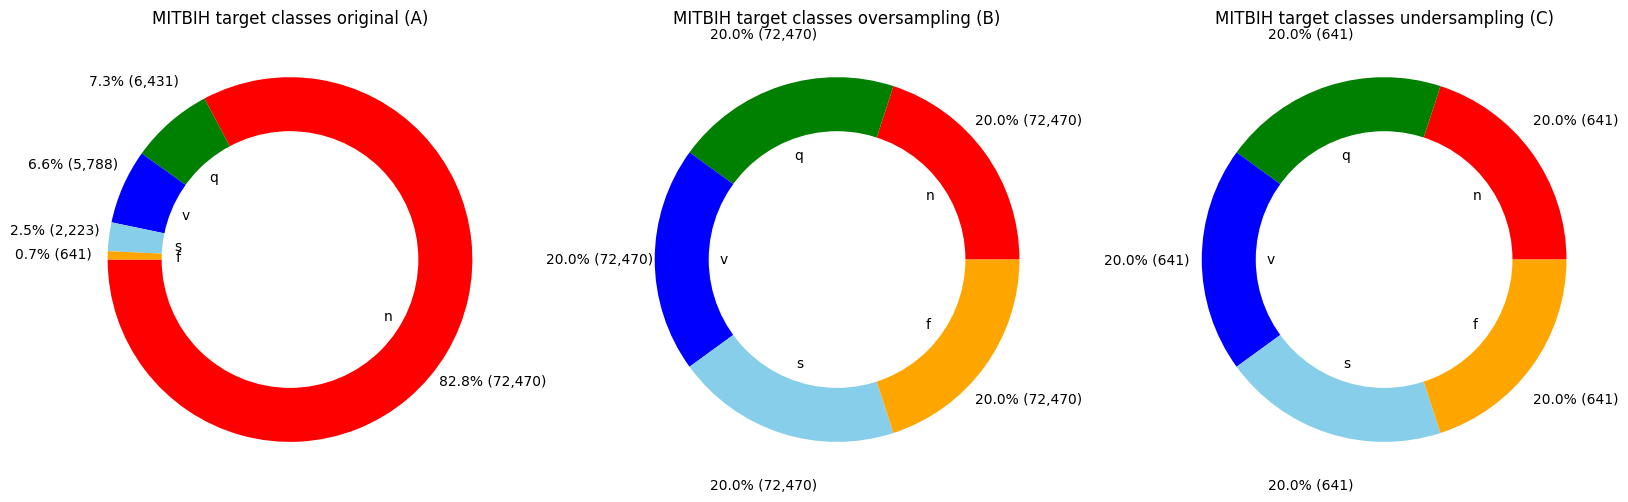

----------------------------------------------------------------------------------------------------------


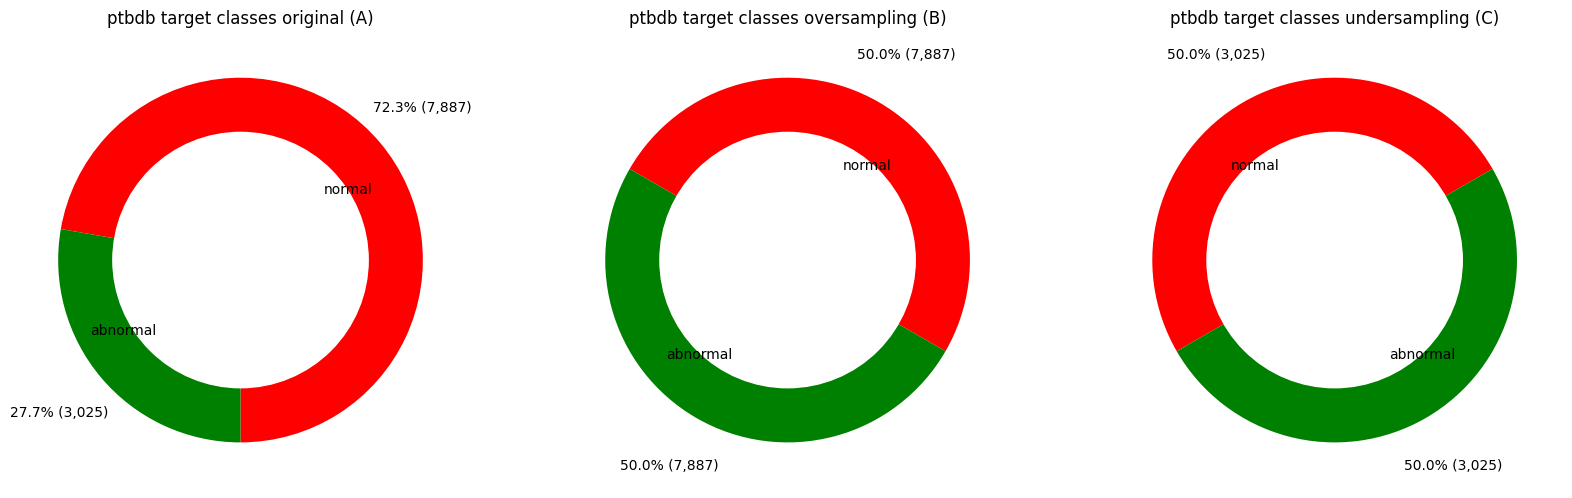

In [3]:
#Mitbih-Code:
#allocating train_set to X and y for comparison purposes:
X_mitbih_train_a = mitbih_train.iloc[:, :-1] #All values except the last column
y_mitbih_train_a = mitbih_train.iloc[:, -1] #all values from last column

X_mitbih_test_a = mitbih_test.iloc[:, :-1] #All values except the last column. MUST NOT BE CHANGED LATER, JUST FOR EVALUATION!
y_mitbih_test_a = mitbih_test.iloc[:, -1] #all values from last column. MUST NOT BE CHANGED LATER, JUST FOR EVALUATION!
#print("Original value count for target in mitbih_train:")
#display(y_mitbih_train_a.value_counts()) #For later comparison.

#Fitting and resampling with RandomOverSampler (case b)
X_mitbih_train_b, y_mitbih_train_b = RandomOverSampler().fit_resample(X_mitbih_train_a, y_mitbih_train_a)
#print("Value count for target in mitbih_train after RandomOverSampler:")
#display(y_mitbih_train_b.value_counts()) #For later comparison. RandomOverSampler samples everything up to the highest count --> This could lead to extreme results and slow models. Will check in modelling part with easy models.

#Fitting and resampling with RandomUnderSampler (case c)
X_mitbih_train_c, y_mitbih_train_c = RandomUnderSampler().fit_resample(X_mitbih_train_a, y_mitbih_train_a)
#print("Value count for target in mitbih_train after RandomUnderSampler:")
#display(y_mitbih_train_c.value_counts()) #For later comparison. Samples everything down to the smallest value count of each class. Should perform fast on model training, but better results?


# Wertezählen und Prozentangaben für y_mitbih_train_a berechnen
value_counts_train_a = y_mitbih_train_a.value_counts()
percentages_train_a = 100 * value_counts_train_a / len(y_mitbih_train_a)

# Wertezählen und Prozentangaben für y_mitbih_train_b berechnen
value_counts_train_b = y_mitbih_train_b.value_counts()
percentages_train_b = 100 * value_counts_train_b / len(y_mitbih_train_b)

# Wertezählen und Prozentangaben für y_mitbih_train_c berechnen
value_counts_train_c = y_mitbih_train_c.value_counts()
percentages_train_c = 100 * value_counts_train_c / len(y_mitbih_train_c)

plt.figure(figsize=(20, 10))  # Erstellen einer gemeinsamen Figure

# Plot für mitbih_train
plt.subplot(1, 3, 1)  # Erstellen von Subplots: 1 Reihe, 2 Spalten, erster Plot
plt.title("MITBIH target classes original (A)")
my_circle_train = plt.Circle((0, 0), 0.7, color='white')
plt.pie(value_counts_train_a, startangle=180 ,labels=['n', 'q', 'v', 's', 'f'], colors=['red', 'green', 'blue', 'skyblue', 'orange'], pctdistance=1.3, labeldistance=0.6,  autopct=lambda p: '{:.1f}% ({:,.0f})'.format(p, p * sum(value_counts_train_a) / 100))
plt.gca().add_artist(my_circle_train)

# Plot für mitbih_test
plt.subplot(1, 3, 2)  # zweiter Plot in der gleichen Reihe
plt.title("MITBIH target classes oversampling (B)")
my_circle_test = plt.Circle((0, 0), 0.7, color='white')
plt.pie(value_counts_train_b, labels=['n', 'q', 'v', 's', 'f'], colors=['red', 'green', 'blue', 'skyblue', 'orange'], pctdistance=1.3, labeldistance=0.6,  autopct=lambda p: '{:.1f}% ({:,.0f})'.format(p, p * sum(value_counts_train_b) / 100))
plt.gca().add_artist(my_circle_test)

# Plot für mitbih_test
plt.subplot(1, 3, 3)  # dritter Plot in der gleichen Reihe
plt.title("MITBIH target classes undersampling (C)")
my_circle_test = plt.Circle((0, 0), 0.7, color='white')
plt.pie(value_counts_train_c, labels=['n', 'q', 'v', 's', 'f'], colors=['red', 'green', 'blue', 'skyblue', 'orange'], pctdistance=1.3, labeldistance=0.6,  autopct=lambda p: '{:.1f}% ({:,.0f})'.format(p, p * sum(value_counts_train_c) / 100))
plt.gca().add_artist(my_circle_test)

plt.show()
print("----------------------------------------------------------------------------------------------------------")
#PTDBD-Code:
#Generating one Dataset and shuffling it in random order. We therefore rename the columns of one of the initial dataframes:
ptbdb_abnormal_2 = ptbdb_abnormal
ptbdb_abnormal_2.columns = ptbdb_normal.columns #We now have the same column names in each dataframe that has to be concatenated.
ptbdb_combined = pd.concat([ptbdb_normal, ptbdb_abnormal_2], ignore_index=True, axis=0)
#display(ptbdb_combined)
#print("Value count for target in ptbdb_combinded after Concatenation:")
#display(ptbdb_combined.iloc[:, -1].value_counts()) 
#display(ptbdb_abnormal.iloc[:, -1].value_counts())
#display(ptbdb_normal.iloc[:, -1].value_counts()) 

#Reshuffle the whole new dataframe
ptbdb_combined_shuffled = ptbdb_combined.sample(frac=1, random_state=42)
#display(ptbdb_combined_shuffled)
#print("Value count for target in ptbdb_combinded_shuffled after shuffling:")
#display(ptbdb_combined_shuffled.iloc[:, -1].value_counts()) 
#display(ptbdb_combined_shuffled.iloc[:, -1].value_counts())
#display(ptbdb_combined_shuffled.iloc[:, -1].value_counts()) 

#Generate Test and Train datasets
X_ptbdb_a = ptbdb_combined_shuffled.iloc[:, :-1] #All values except the last column
y_ptbdb_a = ptbdb_combined_shuffled.iloc[:, -1] #All values from the last column

X_ptbdb_train_a, X_ptbdb_test_a, y_ptbdb_train_a, y_ptbdb_test_a = train_test_split(X_ptbdb_a, y_ptbdb_a, test_size=0.25, random_state=42)
#print("Original value count for target in ptbdb_train:")
#display(y_ptbdb_train_a.value_counts()) #For later comparison.

#Fitting and resampling with RandomOverSampler (case b)
X_ptbdb_train_b, y_ptbdb_train_b = RandomOverSampler().fit_resample(X_ptbdb_train_a, y_ptbdb_train_a)
#print("Value count for target in ptbdb_train after RandomOverSampler:")
#display(y_ptbdb_train_b.value_counts()) #For later comparison. RandomOverSampler samples everything up to the highest count --> This could lead to extreme results and slow models. Will check in modelling part with easy models.

#Fitting and resampling with RandomUnderSampler (case c)
X_ptbdb_train_c, y_ptbdb_train_c = RandomUnderSampler().fit_resample(X_ptbdb_train_a, y_ptbdb_train_a)
#print("Value count for target in ptbdb_train after RandomUnderSampler:")
#display(y_ptbdb_train_c.value_counts()) #For later comparison.


# Wertezählen und Prozentangaben für y_ptbdb_train_a berechnen
value_counts_train_a = y_ptbdb_train_a.value_counts()
percentages_train_a = 100 * value_counts_train_a / len(y_ptbdb_train_a)

# Wertezählen und Prozentangaben für y_ptbdb_train_b berechnen
value_counts_train_b = y_ptbdb_train_b.value_counts()
percentages_train_b = 100 * value_counts_train_b / len(y_ptbdb_train_b)

# Wertezählen und Prozentangaben für y_ptbdb_train_c berechnen
value_counts_train_c = y_ptbdb_train_c.value_counts()
percentages_train_c = 100 * value_counts_train_c / len(y_ptbdb_train_c)

plt.figure(figsize=(20, 10))  # Erstellen einer gemeinsamen Figure

# Plot für ptbdb_train
plt.subplot(1, 3, 1)  # Erstellen von Subplots: 1 Reihe, 2 Spalten, erster Plot
plt.title("ptbdb target classes original (A)")
my_circle_train = plt.Circle((0, 0), 0.7, color='white')
plt.pie(value_counts_train_a, startangle=270 ,labels=['normal', 'abnormal'], colors=['red', 'green'], pctdistance=1.3, labeldistance=0.6,  autopct=lambda p: '{:.1f}% ({:,.0f})'.format(p, p * sum(value_counts_train_a) / 100))
plt.gca().add_artist(my_circle_train)

# Plot für ptbdb_test
plt.subplot(1, 3, 2)  # zweiter Plot in der gleichen Reihe
plt.title("ptbdb target classes oversampling (B)")
my_circle_test = plt.Circle((0, 0), 0.7, color='white')
plt.pie(value_counts_train_b, startangle=-30 ,labels=['normal', 'abnormal'], colors=['red', 'green'], pctdistance=1.3, labeldistance=0.6,  autopct=lambda p: '{:.1f}% ({:,.0f})'.format(p, p * sum(value_counts_train_b) / 100))
plt.gca().add_artist(my_circle_test)

# Plot für ptbdb_test
plt.subplot(1, 3, 3)  # dritter Plot in der gleichen Reihe
plt.title("ptbdb target classes undersampling (C)")
my_circle_test = plt.Circle((0, 0), 0.7, color='white')
plt.pie(value_counts_train_c, startangle=30 , labels=['normal', 'abnormal'], colors=['red', 'green'], pctdistance=1.3, labeldistance=0.6,  autopct=lambda p: '{:.1f}% ({:,.0f})'.format(p, p * sum(value_counts_train_c) / 100))
plt.gca().add_artist(my_circle_test)

plt.show()


## Recheck for normal distribution

In [25]:
#Using only a histogram

def shapiro_stats(df):
    df_name = df.name if hasattr(df, 'name') and df.name is not None else str([name for name, obj in globals().items() if obj is df][0])
    shapiro_stats = []
    shapiro_ps = []
    for col in range(len(df.columns)):
        shapiro_stat, shapiro_p = shapiro(df.iloc[: , col])
        #sns.histplot(data=mitbih_train, x=mitbih_train.iloc[:5000, col])
        #print(f"shapiro statistic value: {shapiro_stat}. Shapiro p-value: {shapiro_p}")
        #plt.show()
        shapiro_stats.append(round(shapiro_stat, 20))
        shapiro_ps.append(round(shapiro_p, 20))
    print(f"Shapiro statistics for {df_name}")
    display(pd.crosstab(shapiro_stats, "count", colnames=["Count of single unique values"], rownames=["Values of shapiro statistic"]))
    display(pd.crosstab(shapiro_ps, "count", colnames=["Count of single unique values"], rownames=["Values of shapiro p value"]))
    sns.histplot(data=shapiro_stats)
    plt.show()
    sns.histplot(data=shapiro_ps)
    plt.show()

#shapiro_stats(X_ptbdb_train_a)
#shapiro_stats(X_ptbdb_train_b)
#shapiro_stats(X_ptbdb_train_c)


We see now, that the data is not normal distributed in all cases. We could try to map it to normal distribution, then parametrical tests and models would be more applicable.

---------------------------------------------------------------------------------


0         1         2         3         4         5         6    \
0     0.647762  1.416654  0.502145 -0.672627 -1.374694 -0.944310 -0.705727   
1     0.394210  1.416654  0.569549  0.259602  0.493351  0.386232  0.235949   
2     0.825693  0.930575 -0.201135 -0.352848 -0.527730 -0.624384 -1.119915   
3     0.185843  0.720136 -0.253966 -1.176624 -0.253949  0.309795  0.370567   
4     0.825693  1.137625  1.094953  0.193904 -0.550620 -0.208083 -0.358727   
...        ...       ...       ...       ...       ...       ...       ...   
3200 -0.500599 -0.408405  0.719420  1.188779  1.270064  1.217000  1.152708   
3201 -0.905614 -0.708071  0.477433  1.133336  1.303862  1.310436  1.233286   
3202 -1.652180 -1.435195 -0.444155  0.298487  0.502447  0.408491  0.270098   
3203  0.825693 -0.800426  0.433591  1.021550  1.196625  1.165212  1.016987   
3204  0.825693 -0.943781  0.403545  1.162346  1.367976  1.398315  1.420612   

           7         8         9    ...       177       178       179  \
0    -0.697302 -0.790475 -0.665736  ... -0.210487 -0.205603 -0.198918   
1     0.076485  0.062906 -0.159662  ... -0.210487 -0.205603 -0.198918   
2    -1.203519 -1.518780 -1.670161  ... -0.210487 -0.205603 -0.198918   
3     0.619434  0.764365  0.885062  ...  4.760280  4.869166  5.033881   
4    -0.847725 -1.169477 -1.271341  ... -0.210487 -0.205603 -0.198918   
...        ...       ...       ...  ...       ...       ...       ...   
3200  1.037900  0.758462  0.007100  ... -0.210487 -0.205603 -0.198918   
3201  1.152358  0.815253  0.405873  ... -0.210487 -0.205603 -0.198918   
3202  0.106647 -0.125920 -0.993800  ... -0.210487 -0.205603 -0.198918   
3203  0.918896  0.769440  0.555519  ... -0.210487 -0.205603 -0.198918   
3204  1.424011  1.106038  0.839522  ... -0.210487 -0.205603 -0.198918   

           180       181       182       183      184      185       186  
0    -0.195474 -0.190231 -0.183099 -0.180377 -0.17663 -0.17739 -0.175321  
1    -0.195474 -0.190231 -0.183099 -0.180377 -0.17663 -0.17739 -0.175321  
2    -0.195474 -0.190231 -0.183099 -0.180377 -0.17663 -0.17739 -0.175321  
3     5.128016  5.267637  5.470887 -0.180377 -0.17663 -0.17739 -0.175321  
4    -0.195474 -0.190231 -0.183099 -0.180377 -0.17663 -0.17739 -0.175321  
...        ...       ...       ...       ...      ...      ...       ...  
3200 -0.195474 -0.190231 -0.183099 -0.180377 -0.17663 -0.17739 -0.175321  
3201 -0.195474 -0.190231 -0.183099 -0.180377 -0.17663 -0.17739 -0.175321  
3202 -0.195474 -0.190231 -0.183099 -0.180377 -0.17663 -0.17739 -0.175321  
3203 -0.195474 -0.190231 -0.183099 -0.180377 -0.17663 -0.17739 -0.175321  
3204 -0.195474 -0.190231 -0.183099 -0.180377 -0.17663 -0.17739 -0.175321  

[3205 rows x 187 columns]

before:


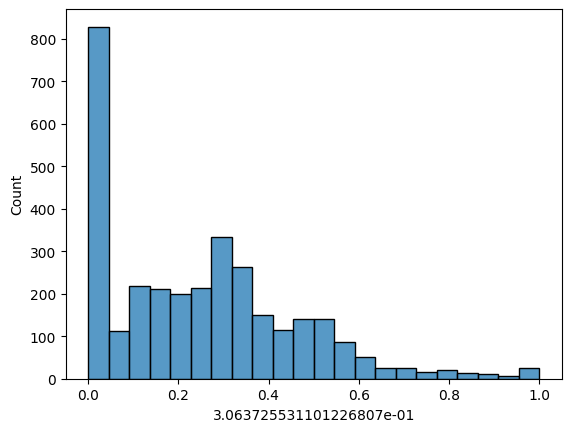

after:


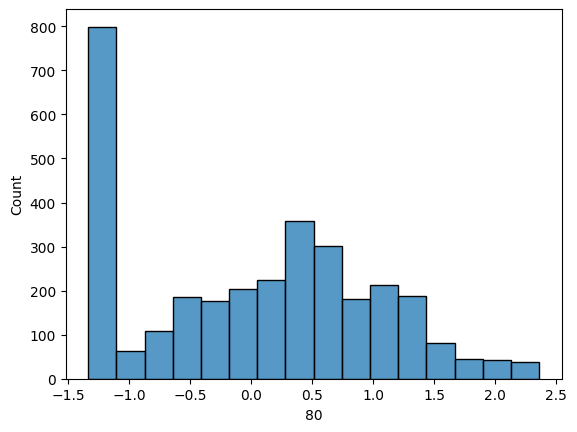

Shapiro statistics for X_mitbih_train_c_normal_bc


Count of single unique values  count
Values of shapiro statistic         
0.158548                           1
0.160079                           1
0.161132                           1
0.164596                           1
0.167909                           1
...                              ...
0.989334                           1
0.989636                           1
0.990226                           1
0.990842                           1
0.990908                           1

[187 rows x 1 columns]

Count of single unique values  count
Values of shapiro p value           
0.000000e+00                     158
1.000000e-20                       1
2.000000e-20                       1
6.000000e-20                       2
8.000000e-20                       1
1.900000e-19                       1
1.150000e-18                       1
1.600000e-18                       1
2.040000e-18                       1
1.090000e-17                       1
3.580000e-17                       1
4.587000e-17                       1
4.424200e-16                       1
1.036580e-15                       1
3.546140e-15                       1
4.008780e-15                       1
4.785500e-15                       1
4.863120e-15                       1
4.951870e-15                       1
5.270470e-15                       1
5.411680e-15                       1
5.579790e-15                       1
6.289620e-15                       1
6.377660e-15                       1
8.697900e-15                       1
1.548999e-14                       1
4.938585e-14                       1
1.739931e-13                       1
1.999934e-13                       1

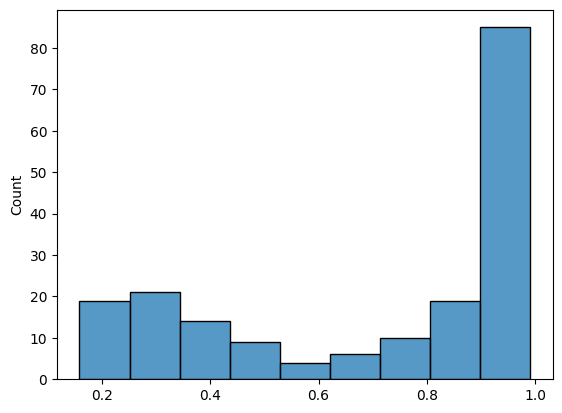

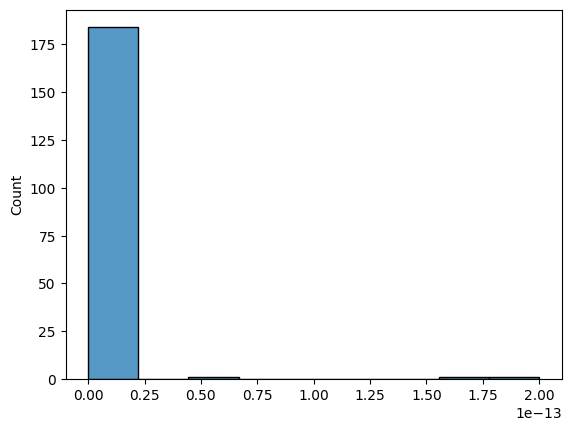

In [26]:
# Map Data to a normal distribution.
bc = PowerTransformer(method="box-cox") #only for positive values
yj = PowerTransformer(method="yeo-johnson")

"""#perform power transformations:
X_mitbih_train_a_normal_bc = pd.DataFrame(yj.fit_transform(X_mitbih_train_a))
display(X_mitbih_train_a_normal_bc)
print("before:")
sns.histplot(data=X_mitbih_train_a, x=X_mitbih_train_a.iloc[:, 80])
plt.show()
print("after:")
sns.histplot(data=X_mitbih_train_a_normal_bc, x=X_mitbih_train_a_normal_bc.iloc[:, 80])
plt.show()
#use shapiro stats for testing:
shapiro_stats(X_mitbih_train_a_normal_bc)

print("---------------------------------------------------------------------------------")

#perform power transformations:
X_mitbih_train_b_normal_bc = pd.DataFrame(yj.fit_transform(X_mitbih_train_b))
display(X_mitbih_train_b_normal_bc)
print("before:")
sns.histplot(data=X_mitbih_train_b, x=X_mitbih_train_b.iloc[:, 80])
plt.show()
print("after:")
sns.histplot(data=X_mitbih_train_b_normal_bc, x=X_mitbih_train_b_normal_bc.iloc[:, 80])
plt.show()
#use shapiro stats for testing:
shapiro_stats(X_mitbih_train_b_normal_bc)"""

print("---------------------------------------------------------------------------------")

#perform power transformations:
X_mitbih_train_c_normal_bc = pd.DataFrame(yj.fit_transform(X_mitbih_train_c))
display(X_mitbih_train_c_normal_bc)
print("before:")
sns.histplot(data=X_mitbih_train_c, x=X_mitbih_train_c.iloc[:, 80])
plt.show()
print("after:")
sns.histplot(data=X_mitbih_train_c_normal_bc, x=X_mitbih_train_c_normal_bc.iloc[:, 80])
plt.show()
#use shapiro stats for testing:
shapiro_stats(X_mitbih_train_c_normal_bc)